# Проект: Линейные модели в машинном обучении

<div style="border:solid Chocolate 2px; padding: 40px">

Есть IT-компания, которая выполняет на заказ проекты по машинному обучению. К нам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
Поэтому он просит нас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Нам нужно создать две прогнозные модели для отбора бурёнок в поголовье:

План по выполнению кейса:
1. Загрузим данные и ознакомимся с ними

2. Предобработка данных: найдем все, что может помешать при разборе задач (явные, неявные дубликаты, пропущенные значения, проверка корректности типов данных)

3. Исследовательский анализ данных:

3.1 Статистический анализ

3.2 Построим графики, чтобы визуализировать данные

3.3 Напишем выводы по данным (есть ли выбросы, нормально ли распределены данные). 

4. Корреляционный анализ (найдем взаимосвязи, то есть корреляцию, между всеми входящими признаками

5. Обучение модели линейной регрессии - создадим МО по нашим данным

6. Обучение модели логистической регрессии - создадим МО по нашим данным

7. Общий вывод



## Загрузка данных

Загрузим сразу все библиотеки, которые могут нам пригодиться

In [1]:
!pip install scikit-learn==1.1.3 -q

In [2]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import mean_absolute_error
from scipy import stats as st
from sklearn.model_selection import cross_val_predict

Есть три датасета, загрузим их

In [3]:
if os.path.exists("C:/Users/User/Downloads/ferma_main.csv"):
    df_ferma_main = pd.read_csv("C:/Users/User/Downloads/ferma_main.csv", sep=';')

if os.path.exists("C:/Users/User/Downloads/ferma_dad.csv"):
    df_ferma_dad = pd.read_csv("C:/Users/User/Downloads/ferma_dad.csv", sep=';')

if os.path.exists("C:/Users/User/Downloads/cow_buy.csv"):
    df_cow_buy = pd.read_csv("C:/Users/User/Downloads/cow_buy.csv", sep=';')

In [4]:
display(df_ferma_main)

id  Удой, кг ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0      1      5863                                  14,2              1743   
1      2      5529                                  12,8              2138   
2      3      5810                                    14              1854   
3      4      5895                                  12,4              2012   
4      5      5302                                  12,8              1675   
..   ...       ...                                   ...               ...   
629  627      5970                                  14,4              1837   
630  627      5970                                  14,4              1837   
631  627      5970                                  14,4              1837   
632  627      5970                                  14,4              1837   
633  627      5970                                  14,4              1837   

    СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                   0,89   Вис Бик Айдиал    Равнинное   
1                                   0,89   Вис Бик Айдиал    Равнинные   
2                                  0,885  РефлешнСоверинг    Холмистое   
3                                  0,885  РефлешнСоверинг    Холмистое   
4                                  0,885   Вис Бик Айдиал    Равнинные   
..                                   ...              ...          ...   
629                                 0,88  РефлешнСоверинг    Холмистое   
630                                 0,88  РефлешнСоверинг    Холмистое   
631                                 0,88  РефлешнСоверинг    Холмистое   
632                                 0,88  РефлешнСоверинг    Холмистое   
633                                 0,88  РефлешнСоверинг    Холмистое   

    порода папы_быка Жирность,% Белок,% Вкус молока      Возраст  
0             Айдиал       3,58   3,076      вкусно  более_2_лет  
1            Соверин       3,54   3,079      вкусно  менее_2_лет  
2            Соверин       3,59   3,074   не вкусно  более_2_лет  
3             Айдиал        3,4   3,075   не вкусно  более_2_лет  
4            Соверин       3,73   3,073      вкусно  менее_2_лет  
..               ...        ...     ...         ...          ...  
629          Соверин       3,64   3,075   не вкусно  более_2_лет  
630          Соверин       3,64   3,075   не вкусно  более_2_лет  
631          Соверин       3,64   3,075   не вкусно  более_2_лет  
632          Соверин       3,64   3,075   не вкусно  более_2_лет  
633          Соверин       3,64   3,075   не вкусно  более_2_лет  

[634 rows x 12 columns]

In [5]:
display(df_ferma_dad)

id  Имя Папы
0      1    Буйный
1      2  Соловчик
2      3     Барин
3      4    Буйный
4      5     Барин
..   ...       ...
624  625    Буйный
625  626     Барин
626  627     Барин
627  628     Барин
628  629  Соловчик

[629 rows x 2 columns]

In [6]:
display(df_cow_buy)

Порода Тип пастбища порода папы_быка  Имя_папы  \
0    Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
1    Вис Бик Айдиал    равнинное          Соверин    Буйный   
2   РефлешнСоверинг    равнинное          Соверин     Барин   
3   РефлешнСоверинг    холмистое           Айдиал    Буйный   
4   РефлешнСоверинг    равнинное           Айдиал    Буйный   
5   РефлешнСоверинг    равнинное          Соверин  Геркулес   
6    Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
7    Вис Бик Айдиал    равнинное          Соверин    Буйный   
8   РефлешнСоверинг    равнинное          Соверин     Барин   
9   РефлешнСоверинг    холмистое           Айдиал    Буйный   
10   Вис Бик Айдиал    холмистое          Соверин  Соловчик   
11  РефлешнСоверинг    равнинное          Соверин  Геркулес   
12   Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
13   Вис Бик Айдиал    холмистое          Соверин     Барин   
14  РефлешнСоверинг    равнинное          Соверин     Барин   
15  РефлешнСоверинг    холмистое           Айдиал    Буйный   
16   Вис Бик Айдиал    холмистое          Соверин  Соловчик   
17  РефлешнСоверинг    равнинное          Соверин  Геркулес   
18   Вис Бик Айдиал    равнинное          Соверин    Буйный   
19  РефлешнСоверинг    равнинное           Айдиал    Буйный   

   Текущая_жирность,% Текущий_уровень_белок,%      Возраст  
0                3,58                   3,076  более_2_лет  
1                3,54                   3,081  менее_2_лет  
2                3,59                   3,074  более_2_лет  
3                 3,4                   3,061  более_2_лет  
4                3,64                   3,074  более_2_лет  
5                3,63                   3,053  менее_2_лет  
6                3,58                   3,076  более_2_лет  
7                3,57                   3,079  более_2_лет  
8                3,59                   3,074  более_2_лет  
9                 3,4                   3,079  менее_2_лет  
10               3,73                   3,055  более_2_лет  
11               3,73                   3,073  более_2_лет  
12               3,68                   3,046  более_2_лет  
13               3,42                   3,075  менее_2_лет  
14               3,59                   3,074  более_2_лет  
15                3,4                   3,065  более_2_лет  
16               3,73                   3,079  более_2_лет  
17               3,77                   3,053  менее_2_лет  
18               3,34                   3,069  более_2_лет  
19               3,64                   3,074  более_2_лет

In [7]:
df_ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

In [8]:
df_ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [9]:
df_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


---

### Вывод:

Все три датасета неудобны для чтения, а также есть столбцы с неподходящими типами данных, будем менять: 

1. Приведем все к нижнему регистру

2. Сократим названия столбцов

3. Поменяем типы данных
---


##  Предобработка данных

Для удобства просмотра данных приведем все строки к нижнему регистру и переименуем столбцы

In [10]:
df_ferma_main = df_ferma_main.rename(
    columns={'Удой, кг': 'yield_kg', 'ЭКЕ (Энергетическая кормовая единица)': 'efu','Сырой протеин, г': 'crude_protein_gr', 'СПО (Сахаро-протеиновое соотношение)': 'sugar_protein_ratio', 'Порода': 'breed','Тип пастбища': 'pasture_type','порода папы_быка': 'dad_breed', 'Жирность,%': 'fat_per', 'Белок,%': 'protein_per', 'Вкус молока': 'milk_taste', 'Возраст': 'age'}
)
display(df_ferma_main)

id  yield_kg   efu  crude_protein_gr sugar_protein_ratio  \
0      1      5863  14,2              1743                0,89   
1      2      5529  12,8              2138                0,89   
2      3      5810    14              1854               0,885   
3      4      5895  12,4              2012               0,885   
4      5      5302  12,8              1675               0,885   
..   ...       ...   ...               ...                 ...   
629  627      5970  14,4              1837                0,88   
630  627      5970  14,4              1837                0,88   
631  627      5970  14,4              1837                0,88   
632  627      5970  14,4              1837                0,88   
633  627      5970  14,4              1837                0,88   

               breed pasture_type dad_breed fat_per protein_per milk_taste  \
0     Вис Бик Айдиал    Равнинное    Айдиал    3,58       3,076     вкусно   
1     Вис Бик Айдиал    Равнинные   Соверин    3,54       3,079     вкусно   
2    РефлешнСоверинг    Холмистое   Соверин    3,59       3,074  не вкусно   
3    РефлешнСоверинг    Холмистое    Айдиал     3,4       3,075  не вкусно   
4     Вис Бик Айдиал    Равнинные   Соверин    3,73       3,073     вкусно   
..               ...          ...       ...     ...         ...        ...   
629  РефлешнСоверинг    Холмистое   Соверин    3,64       3,075  не вкусно   
630  РефлешнСоверинг    Холмистое   Соверин    3,64       3,075  не вкусно   
631  РефлешнСоверинг    Холмистое   Соверин    3,64       3,075  не вкусно   
632  РефлешнСоверинг    Холмистое   Соверин    3,64       3,075  не вкусно   
633  РефлешнСоверинг    Холмистое   Соверин    3,64       3,075  не вкусно   

             age  
0    более_2_лет  
1    менее_2_лет  
2    более_2_лет  
3    более_2_лет  
4    менее_2_лет  
..           ...  
629  более_2_лет  
630  более_2_лет  
631  более_2_лет  
632  более_2_лет  
633  более_2_лет  

[634 rows x 12 columns]

In [11]:
df_ferma_main['breed'] = df_ferma_main['breed'].str.lower()
df_ferma_main['pasture_type'] = df_ferma_main['pasture_type'].str.lower()
df_ferma_main['dad_breed'] = df_ferma_main['dad_breed'].str.lower()
display(df_ferma_main)

id  yield_kg   efu  crude_protein_gr sugar_protein_ratio  \
0      1      5863  14,2              1743                0,89   
1      2      5529  12,8              2138                0,89   
2      3      5810    14              1854               0,885   
3      4      5895  12,4              2012               0,885   
4      5      5302  12,8              1675               0,885   
..   ...       ...   ...               ...                 ...   
629  627      5970  14,4              1837                0,88   
630  627      5970  14,4              1837                0,88   
631  627      5970  14,4              1837                0,88   
632  627      5970  14,4              1837                0,88   
633  627      5970  14,4              1837                0,88   

               breed pasture_type dad_breed fat_per protein_per milk_taste  \
0     вис бик айдиал    равнинное    айдиал    3,58       3,076     вкусно   
1     вис бик айдиал    равнинные   соверин    3,54       3,079     вкусно   
2    рефлешнсоверинг    холмистое   соверин    3,59       3,074  не вкусно   
3    рефлешнсоверинг    холмистое    айдиал     3,4       3,075  не вкусно   
4     вис бик айдиал    равнинные   соверин    3,73       3,073     вкусно   
..               ...          ...       ...     ...         ...        ...   
629  рефлешнсоверинг    холмистое   соверин    3,64       3,075  не вкусно   
630  рефлешнсоверинг    холмистое   соверин    3,64       3,075  не вкусно   
631  рефлешнсоверинг    холмистое   соверин    3,64       3,075  не вкусно   
632  рефлешнсоверинг    холмистое   соверин    3,64       3,075  не вкусно   
633  рефлешнсоверинг    холмистое   соверин    3,64       3,075  не вкусно   

             age  
0    более_2_лет  
1    менее_2_лет  
2    более_2_лет  
3    более_2_лет  
4    менее_2_лет  
..           ...  
629  более_2_лет  
630  более_2_лет  
631  более_2_лет  
632  более_2_лет  
633  более_2_лет  

[634 rows x 12 columns]

In [12]:
df_ferma_dad['Имя Папы'] = df_ferma_dad['Имя Папы'].str.lower()
df_ferma_dad = df_ferma_dad.rename(
    columns={'Имя Папы': 'dad_name'}
)
display(df_ferma_dad)

id  dad_name
0      1    буйный
1      2  соловчик
2      3     барин
3      4    буйный
4      5     барин
..   ...       ...
624  625    буйный
625  626     барин
626  627     барин
627  628     барин
628  629  соловчик

[629 rows x 2 columns]

In [13]:
df_cow_buy['Порода'] = df_cow_buy['Порода'].str.lower()
df_cow_buy['порода папы_быка'] = df_cow_buy['порода папы_быка'].str.lower()
df_cow_buy['Имя_папы'] = df_cow_buy['Имя_папы'].str.lower()
df_cow_buy = df_cow_buy.rename(
    columns={'Порода': 'breed', 'Тип пастбища': 'pasture_type', 'порода папы_быка': 'dad_breed', 'Имя_папы': 'dad_name', 'Текущая_жирность,%': 'fat_per', 'Текущий_уровень_белок,%': 'protein_per', 'Возраст': 'age'}
)
display(df_cow_buy)

breed pasture_type dad_breed  dad_name fat_per protein_per  \
0    вис бик айдиал    холмистое    айдиал  геркулес    3,58       3,076   
1    вис бик айдиал    равнинное   соверин    буйный    3,54       3,081   
2   рефлешнсоверинг    равнинное   соверин     барин    3,59       3,074   
3   рефлешнсоверинг    холмистое    айдиал    буйный     3,4       3,061   
4   рефлешнсоверинг    равнинное    айдиал    буйный    3,64       3,074   
5   рефлешнсоверинг    равнинное   соверин  геркулес    3,63       3,053   
6    вис бик айдиал    холмистое    айдиал  геркулес    3,58       3,076   
7    вис бик айдиал    равнинное   соверин    буйный    3,57       3,079   
8   рефлешнсоверинг    равнинное   соверин     барин    3,59       3,074   
9   рефлешнсоверинг    холмистое    айдиал    буйный     3,4       3,079   
10   вис бик айдиал    холмистое   соверин  соловчик    3,73       3,055   
11  рефлешнсоверинг    равнинное   соверин  геркулес    3,73       3,073   
12   вис бик айдиал    холмистое    айдиал  геркулес    3,68       3,046   
13   вис бик айдиал    холмистое   соверин     барин    3,42       3,075   
14  рефлешнсоверинг    равнинное   соверин     барин    3,59       3,074   
15  рефлешнсоверинг    холмистое    айдиал    буйный     3,4       3,065   
16   вис бик айдиал    холмистое   соверин  соловчик    3,73       3,079   
17  рефлешнсоверинг    равнинное   соверин  геркулес    3,77       3,053   
18   вис бик айдиал    равнинное   соверин    буйный    3,34       3,069   
19  рефлешнсоверинг    равнинное    айдиал    буйный    3,64       3,074   

            age  
0   более_2_лет  
1   менее_2_лет  
2   более_2_лет  
3   более_2_лет  
4   более_2_лет  
5   менее_2_лет  
6   более_2_лет  
7   более_2_лет  
8   более_2_лет  
9   менее_2_лет  
10  более_2_лет  
11  более_2_лет  
12  более_2_лет  
13  менее_2_лет  
14  более_2_лет  
15  более_2_лет  
16  более_2_лет  
17  менее_2_лет  
18  более_2_лет  
19  более_2_лет

---
### Промежуточный вывод:
Изменили названия столбцов и привели к нижнему регистру, теперь поменяем типы данных

---

In [14]:
df_ferma_main['efu'] = df_ferma_main['efu'].replace(',', '.', regex=True)
df_ferma_main['sugar_protein_ratio'] = df_ferma_main['sugar_protein_ratio'].replace(',', '.', regex=True)
df_ferma_main['fat_per'] = df_ferma_main['fat_per'].replace(',', '.', regex=True)
df_ferma_main['protein_per'] = df_ferma_main['protein_per'].replace(',', '.', regex=True)
df_ferma_main['efu'] = df_ferma_main['efu'].astype(float)
df_ferma_main['sugar_protein_ratio'] = df_ferma_main['sugar_protein_ratio'].astype(float)
df_ferma_main['fat_per'] = df_ferma_main['fat_per'].astype(float)
df_ferma_main['protein_per'] = df_ferma_main['protein_per'].astype(float)
df_ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   634 non-null    int64  
 1   yield_kg             634 non-null    int64  
 2   efu                  634 non-null    float64
 3   crude_protein_gr     634 non-null    int64  
 4   sugar_protein_ratio  634 non-null    float64
 5   breed                634 non-null    object 
 6   pasture_type         634 non-null    object 
 7   dad_breed            634 non-null    object 
 8   fat_per              634 non-null    float64
 9   protein_per          634 non-null    float64
 10  milk_taste           634 non-null    object 
 11  age                  634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [15]:
df_cow_buy['fat_per'] = df_cow_buy['fat_per'].replace(',', '.', regex=True)
df_cow_buy['protein_per'] = df_cow_buy['protein_per'].replace(',', '.', regex=True)
df_cow_buy['fat_per'] = df_cow_buy['fat_per'].astype(float)
df_cow_buy['protein_per'] = df_cow_buy['protein_per'].astype(float)
df_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   breed         20 non-null     object 
 1   pasture_type  20 non-null     object 
 2   dad_breed     20 non-null     object 
 3   dad_name      20 non-null     object 
 4   fat_per       20 non-null     float64
 5   protein_per   20 non-null     float64
 6   age           20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


---
### Промежуточный вывод:

Изменили типы данных, проверим данные на пропуски, явные дубликаты, а также проверим все уникальные значения, так как на первый взгляд видно, что их немного, поэтому можем изменить все названия, также для удобства

---

In [16]:
print(df_ferma_main['breed'].unique())
print(df_ferma_main['pasture_type'].unique())
print(df_ferma_main['dad_breed'].unique())
print(df_ferma_main['milk_taste'].unique())
print(df_ferma_main['age'].unique())

['вис бик айдиал' 'рефлешнсоверинг']
['равнинное' 'равнинные' 'холмистое']
['айдиал' 'соверин' 'айдиалл']
['вкусно' 'не вкусно']
['более_2_лет' 'менее_2_лет']


---
#### Меняем

---

In [17]:
df_ferma_main['breed'] = df_ferma_main['breed'].replace('вис бик айдиал', 'vis_back_ideal', regex=True)
df_ferma_main['breed'] = df_ferma_main['breed'].replace('рефлешнсоверинг', 'reflection_sovering', regex=True)
df_ferma_main['pasture_type'] = df_ferma_main['pasture_type'].replace('равнинное', 'flat', regex=True)
df_ferma_main['pasture_type'] = df_ferma_main['pasture_type'].replace('равнинные', 'flat', regex=True)
df_ferma_main['pasture_type'] = df_ferma_main['pasture_type'].replace('холмистое', 'hilly', regex=True)
df_ferma_main['dad_breed'] = df_ferma_main['dad_breed'].replace('айдиал', 'ideal', regex=True)
df_ferma_main['dad_breed'] = df_ferma_main['dad_breed'].replace('айдиалл', 'ideal', regex=True)
df_ferma_main['dad_breed'] = df_ferma_main['dad_breed'].replace('соверин', 'sovereign', regex=True)
df_ferma_main['dad_breed'] = df_ferma_main['dad_breed'].replace('idealл', 'ideal', regex=True)
df_ferma_main['milk_taste'] = df_ferma_main['milk_taste'].replace('вкусно', 'tasty', regex=True)
df_ferma_main['milk_taste'] = df_ferma_main['milk_taste'].replace('не вкусно', 'not_tasty', regex=True)
df_ferma_main['milk_taste'] = df_ferma_main['milk_taste'].replace('не tasty', 'not_tasty', regex=True)
df_ferma_main['age'] = df_ferma_main['age'].replace('более_2_лет', '>2', regex=True)
df_ferma_main['age'] = df_ferma_main['age'].replace('менее_2_лет', '<2', regex=True)
print(df_ferma_main['breed'].unique())
print(df_ferma_main['pasture_type'].unique())
print(df_ferma_main['dad_breed'].unique())
print(df_ferma_main['milk_taste'].unique())
print(df_ferma_main['age'].unique())

['vis_back_ideal' 'reflection_sovering']
['flat' 'hilly']
['ideal' 'sovereign']
['tasty' 'not_tasty']
['>2' '<2']


In [18]:
display(df_ferma_main)

id  yield_kg   efu  crude_protein_gr  sugar_protein_ratio  \
0      1      5863  14.2              1743                0.890   
1      2      5529  12.8              2138                0.890   
2      3      5810  14.0              1854                0.885   
3      4      5895  12.4              2012                0.885   
4      5      5302  12.8              1675                0.885   
..   ...       ...   ...               ...                  ...   
629  627      5970  14.4              1837                0.880   
630  627      5970  14.4              1837                0.880   
631  627      5970  14.4              1837                0.880   
632  627      5970  14.4              1837                0.880   
633  627      5970  14.4              1837                0.880   

                   breed pasture_type  dad_breed  fat_per  protein_per  \
0         vis_back_ideal         flat      ideal     3.58        3.076   
1         vis_back_ideal         flat  sovereign     3.54        3.079   
2    reflection_sovering        hilly  sovereign     3.59        3.074   
3    reflection_sovering        hilly      ideal     3.40        3.075   
4         vis_back_ideal         flat  sovereign     3.73        3.073   
..                   ...          ...        ...      ...          ...   
629  reflection_sovering        hilly  sovereign     3.64        3.075   
630  reflection_sovering        hilly  sovereign     3.64        3.075   
631  reflection_sovering        hilly  sovereign     3.64        3.075   
632  reflection_sovering        hilly  sovereign     3.64        3.075   
633  reflection_sovering        hilly  sovereign     3.64        3.075   

    milk_taste age  
0        tasty  >2  
1        tasty  <2  
2    not_tasty  >2  
3    not_tasty  >2  
4        tasty  <2  
..         ...  ..  
629  not_tasty  >2  
630  not_tasty  >2  
631  not_tasty  >2  
632  not_tasty  >2  
633  not_tasty  >2  

[634 rows x 12 columns]

In [19]:
print(df_ferma_main.isna().sum())

id                     0
yield_kg               0
efu                    0
crude_protein_gr       0
sugar_protein_ratio    0
breed                  0
pasture_type           0
dad_breed              0
fat_per                0
protein_per            0
milk_taste             0
age                    0
dtype: int64


In [20]:
#print(df_ferma_main.duplicated().sum())
df_ferma_main = df_ferma_main.drop_duplicates()
print(df_ferma_main.duplicated().sum())
df_ferma_main.info()

0
<class 'pandas.core.frame.DataFrame'>
Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   629 non-null    int64  
 1   yield_kg             629 non-null    int64  
 2   efu                  629 non-null    float64
 3   crude_protein_gr     629 non-null    int64  
 4   sugar_protein_ratio  629 non-null    float64
 5   breed                629 non-null    object 
 6   pasture_type         629 non-null    object 
 7   dad_breed            629 non-null    object 
 8   fat_per              629 non-null    float64
 9   protein_per          629 non-null    float64
 10  milk_taste           629 non-null    object 
 11  age                  629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB


---
#### С первым датасетом разобрались, переходим ко второму

---

In [21]:
print(df_ferma_dad['dad_name'].unique())

['буйный' 'соловчик' 'барин' 'геркулес']


In [22]:
df_ferma_dad['dad_name'] = df_ferma_dad['dad_name'].replace('буйный', 'buynyi', regex=True)
df_ferma_dad['dad_name'] = df_ferma_dad['dad_name'].replace('соловчик', 'solovchik', regex=True)
df_ferma_dad['dad_name'] = df_ferma_dad['dad_name'].replace('барин', 'barin', regex=True)
df_ferma_dad['dad_name'] = df_ferma_dad['dad_name'].replace('геркулес', 'hercules', regex=True)
print(df_ferma_dad['dad_name'].unique())
display(df_ferma_dad)

['buynyi' 'solovchik' 'barin' 'hercules']


id   dad_name
0      1     buynyi
1      2  solovchik
2      3      barin
3      4     buynyi
4      5      barin
..   ...        ...
624  625     buynyi
625  626      barin
626  627      barin
627  628      barin
628  629  solovchik

[629 rows x 2 columns]

In [23]:
print(df_ferma_dad.duplicated().sum())

0


In [24]:
print(df_ferma_dad.isna().sum())

id          0
dad_name    0
dtype: int64


-------

#### Теперь последний датасет

-------

In [25]:
print(df_cow_buy['breed'].unique())
print(df_cow_buy['pasture_type'].unique())
print(df_cow_buy['dad_breed'].unique())
print(df_cow_buy['dad_name'].unique())
print(df_cow_buy['age'].unique())

['вис бик айдиал' 'рефлешнсоверинг']
['холмистое' 'равнинное']
['айдиал' 'соверин']
['геркулес' 'буйный' 'барин' 'соловчик']
['более_2_лет' 'менее_2_лет']


In [26]:
df_cow_buy['breed'] = df_cow_buy['breed'].replace('вис бик айдиал', 'vis_back_ideal', regex=True)
df_cow_buy['breed'] = df_cow_buy['breed'].replace('рефлешнсоверинг', 'reflection_sovering', regex=True)
df_cow_buy['pasture_type'] = df_cow_buy['pasture_type'].replace('холмистое', 'hilly', regex=True)
df_cow_buy['pasture_type'] = df_cow_buy['pasture_type'].replace('равнинное', 'flat', regex=True)
df_cow_buy['dad_breed'] = df_cow_buy['dad_breed'].replace('айдиал', 'ideal', regex=True)
df_cow_buy['dad_breed'] = df_cow_buy['dad_breed'].replace('соверин', 'sovereign', regex=True)
df_cow_buy['dad_name'] = df_cow_buy['dad_name'].replace('геркулес', 'hercules', regex=True)
df_cow_buy['dad_name'] = df_cow_buy['dad_name'].replace('буйный', 'buynyi', regex=True)
df_cow_buy['dad_name'] = df_cow_buy['dad_name'].replace('барин', 'barin', regex=True)
df_cow_buy['dad_name'] = df_cow_buy['dad_name'].replace('соловчик', 'solovchik', regex=True)
df_cow_buy['age'] = df_cow_buy['age'].replace('более_2_лет', '>2', regex=True)
df_cow_buy['age'] = df_cow_buy['age'].replace('менее_2_лет', '<2', regex=True)
print(df_cow_buy['breed'].unique())
print(df_cow_buy['pasture_type'].unique())
print(df_cow_buy['dad_breed'].unique())
print(df_cow_buy['dad_name'].unique())
print(df_cow_buy['age'].unique())
display(df_cow_buy)

['vis_back_ideal' 'reflection_sovering']
['hilly' 'flat']
['ideal' 'sovereign']
['hercules' 'buynyi' 'barin' 'solovchik']
['>2' '<2']


breed pasture_type  dad_breed   dad_name  fat_per  \
0        vis_back_ideal        hilly      ideal   hercules     3.58   
1        vis_back_ideal         flat  sovereign     buynyi     3.54   
2   reflection_sovering         flat  sovereign      barin     3.59   
3   reflection_sovering        hilly      ideal     buynyi     3.40   
4   reflection_sovering         flat      ideal     buynyi     3.64   
5   reflection_sovering         flat  sovereign   hercules     3.63   
6        vis_back_ideal        hilly      ideal   hercules     3.58   
7        vis_back_ideal         flat  sovereign     buynyi     3.57   
8   reflection_sovering         flat  sovereign      barin     3.59   
9   reflection_sovering        hilly      ideal     buynyi     3.40   
10       vis_back_ideal        hilly  sovereign  solovchik     3.73   
11  reflection_sovering         flat  sovereign   hercules     3.73   
12       vis_back_ideal        hilly      ideal   hercules     3.68   
13       vis_back_ideal        hilly  sovereign      barin     3.42   
14  reflection_sovering         flat  sovereign      barin     3.59   
15  reflection_sovering        hilly      ideal     buynyi     3.40   
16       vis_back_ideal        hilly  sovereign  solovchik     3.73   
17  reflection_sovering         flat  sovereign   hercules     3.77   
18       vis_back_ideal         flat  sovereign     buynyi     3.34   
19  reflection_sovering         flat      ideal     buynyi     3.64   

    protein_per age  
0         3.076  >2  
1         3.081  <2  
2         3.074  >2  
3         3.061  >2  
4         3.074  >2  
5         3.053  <2  
6         3.076  >2  
7         3.079  >2  
8         3.074  >2  
9         3.079  <2  
10        3.055  >2  
11        3.073  >2  
12        3.046  >2  
13        3.075  <2  
14        3.074  >2  
15        3.065  >2  
16        3.079  >2  
17        3.053  <2  
18        3.069  >2  
19        3.074  >2

In [27]:
#print(df_cow_buy.duplicated().sum())
df_cow_buy = df_cow_buy.drop_duplicates()
print(df_cow_buy.duplicated().sum())

0


In [28]:
print(df_cow_buy.isna().sum())

breed           0
pasture_type    0
dad_breed       0
dad_name        0
fat_per         0
protein_per     0
age             0
dtype: int64


---
# Вывод:

#### Выполнили все необходимые меры для удобства просмотра и анализа данных по всем трем датасетам

1. Переименовали столбцы
2. Удалили явные дубликаты
3. Привели все строки к нижнему регистру
4. Заменили все строки с кириллицей на латинские (мне так юудет удобнее)
5. Проверили на наличие пропусков
6. Были схожие уникальные строки вроде("равнинное" "равнинные") привели к одной строке

## Исследовательский анализ данных

#### Начнем со статистического всех признаков

In [29]:
df_ferma_main.describe()

id      yield_kg         efu  crude_protein_gr  \
count  629.00000    629.000000  629.000000        629.000000   
mean   315.00000   6188.750397   14.543879       1923.364070   
std    181.72094   1644.795489    1.306408        182.956251   
min      1.00000   5204.000000   10.900000       1660.000000   
25%    158.00000   5751.000000   13.500000       1771.000000   
50%    315.00000   6133.000000   14.700000       1888.000000   
75%    472.00000   6501.000000   15.600000       2062.000000   
max    629.00000  45616.000000   16.800000       2349.000000   

       sugar_protein_ratio     fat_per  protein_per  
count           629.000000  629.000000   629.000000  
mean              0.913116    3.603657     3.075671  
std               0.032203    0.168656     0.002549  
min               0.840000    2.990000     3.069000  
25%               0.890000    3.590000     3.074000  
50%               0.930000    3.650000     3.076000  
75%               0.940000    3.720000     3.077000  
max               0.960000    3.750000     3.085000

### Промежуточный вывод:

Начнем с построения графиков - гистограммы и боксплоты, есть столбцы, которые не смогут туда войти, такие как id, breed, pasture_type,dad_breed,milk_taste, age, так как все из них типа obj кроме id, но id тоже не включаем так как это просто индетификационный номер

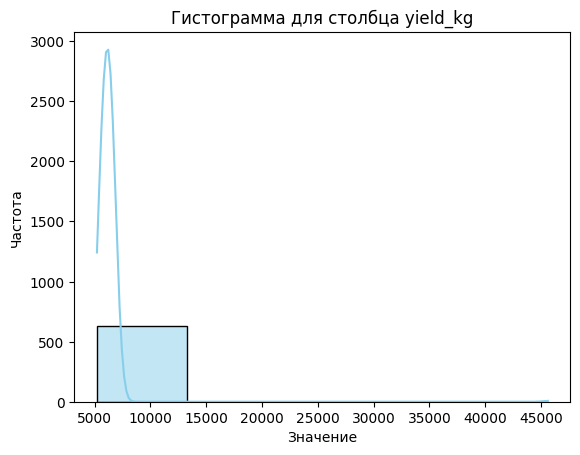

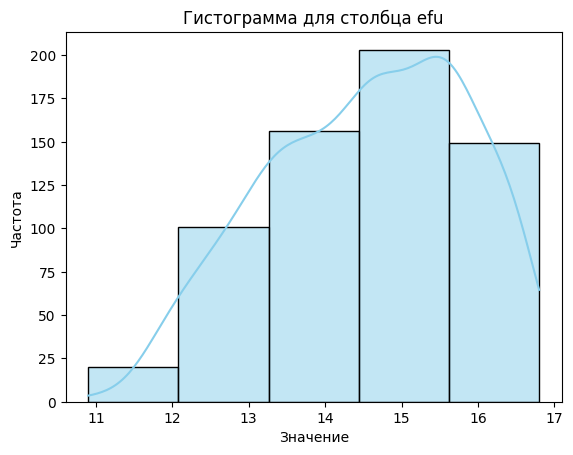

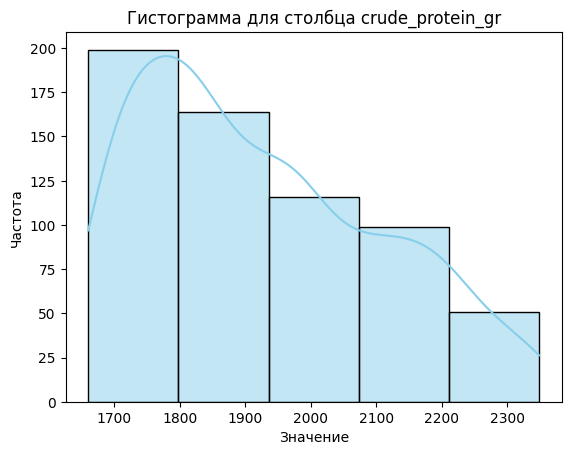

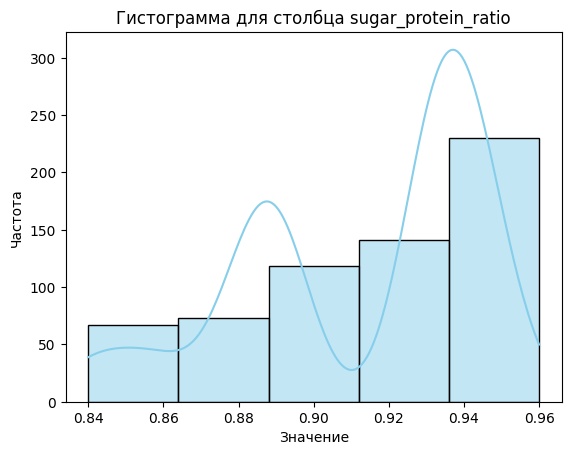

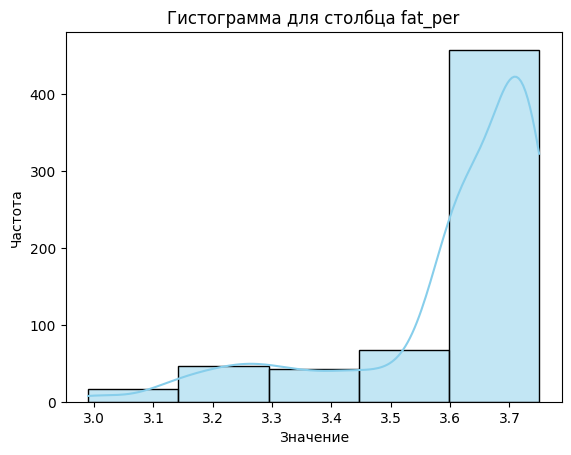

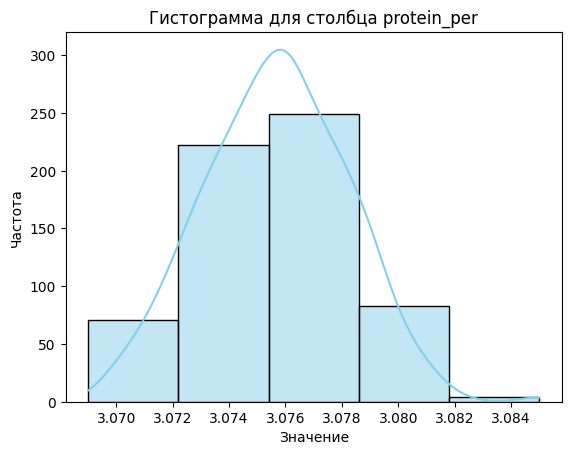

In [30]:
columns_to_exclude = ['id', 'breed', 'pasture_type', 'dad_breed', 'milk_taste', 'age']
for column in df_ferma_main.columns:
    if column not in columns_to_exclude:
        plt.figure()
        sns.histplot(df_ferma_main[column], bins=5, kde=True, color='skyblue')
        plt.title(f'Гистограмма для столбца {column}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
plt.show()

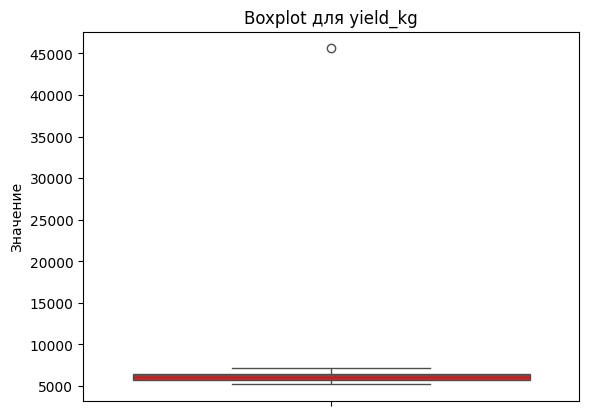

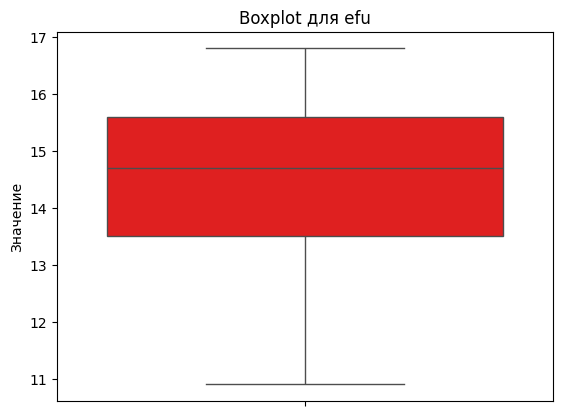

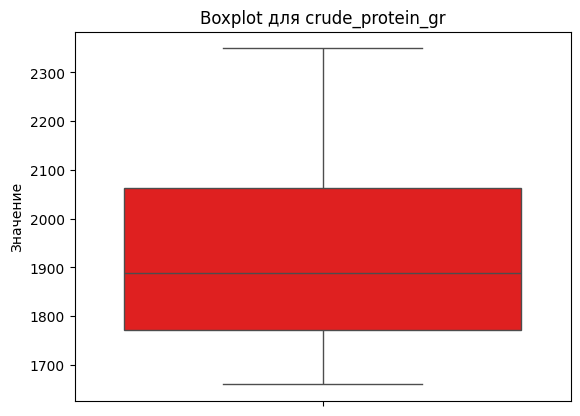

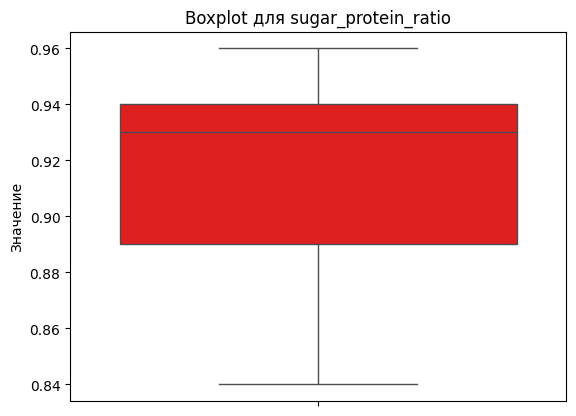

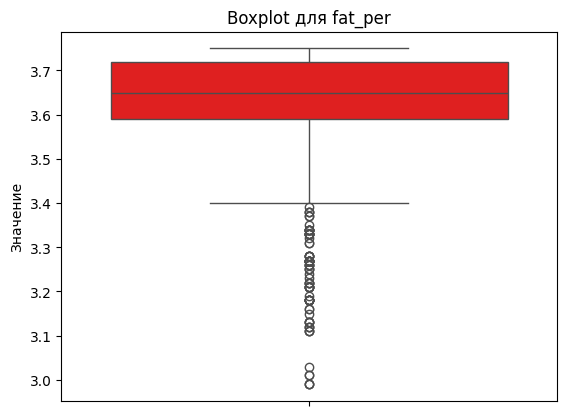

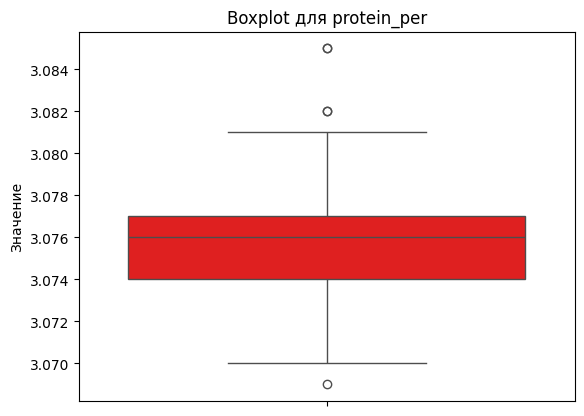

In [31]:
for column in df_ferma_main.columns:
    if column not in columns_to_exclude:
        plt.figure()
        sns.boxplot(y=df_ferma_main[column],color='red')
        plt.title(f'Boxplot для {column}')
        plt.ylabel('Значение')
plt.show()

---

### Промежуточный вывод:

Виден выброс в удое, 45000, и он единственный выброс, ставим фильтр

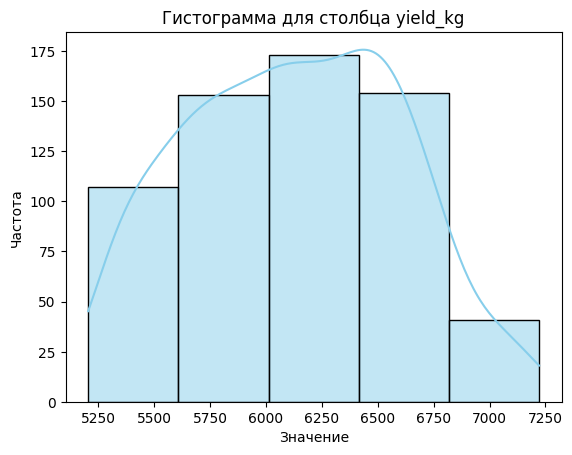

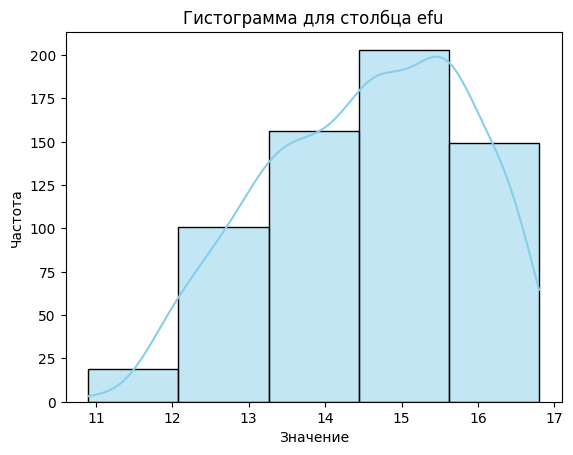

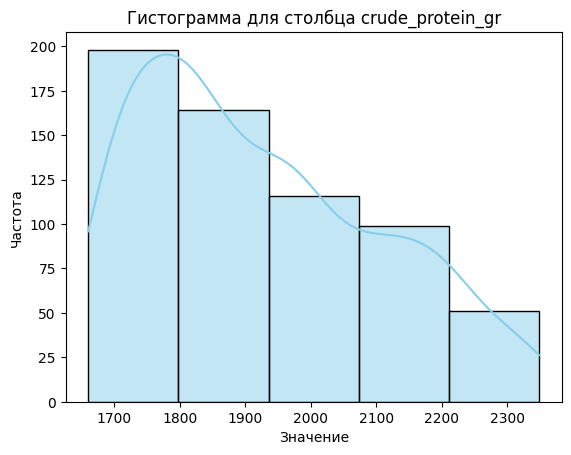

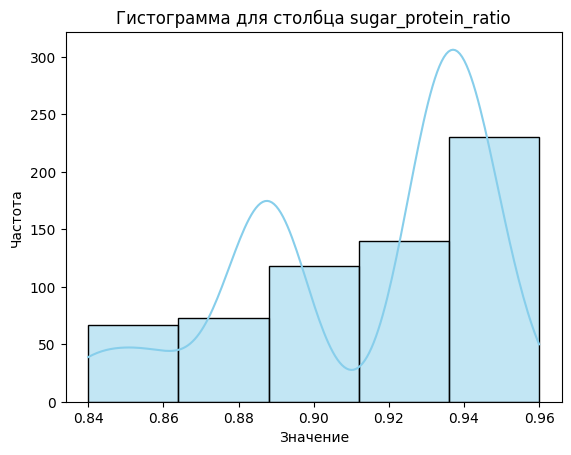

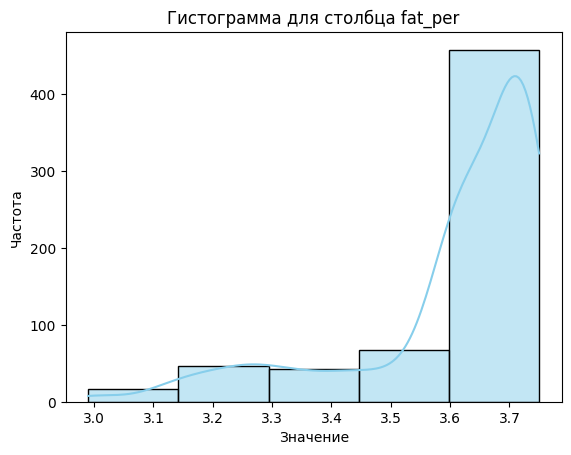

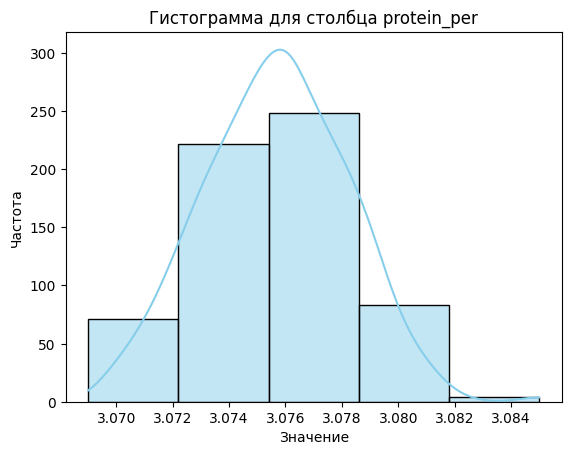

In [32]:
df_ferma_main = df_ferma_main.query('yield_kg<45000')
for column in df_ferma_main.columns:
    if column not in columns_to_exclude:
        plt.figure()
        sns.histplot(df_ferma_main[column], bins=5, kde=True, color='skyblue')
        plt.title(f'Гистограмма для столбца {column}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
plt.show()

<div class="alert alert-info">
Видим, что значения удой распределен нормально, ЭКЕ распределен нормально сос сдивгом вправо, сырой протеин в корме распределен ненормально со сдвигом влево, соотношение сахара к проетину в корме и процентное содержание жира в молоке распределено ненормально со сдвигом вправо, содержание белка в молоке распределено нормально 
</div>

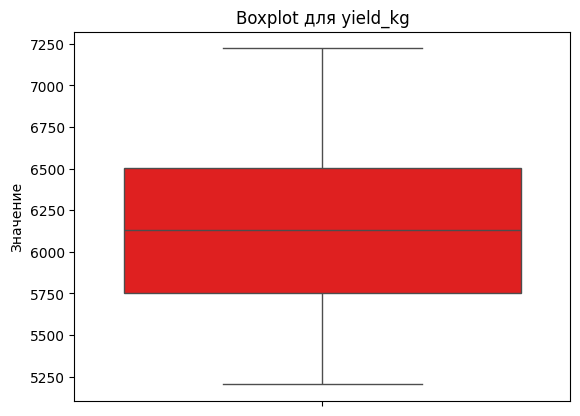

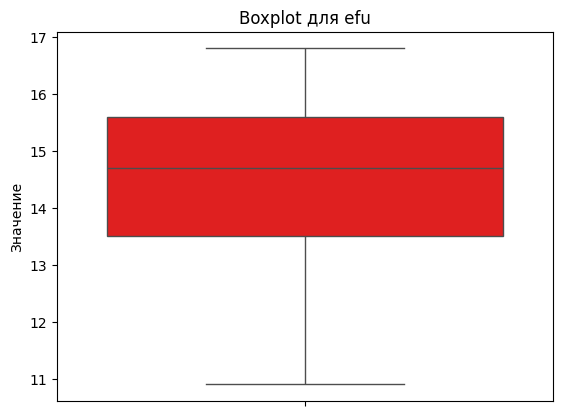

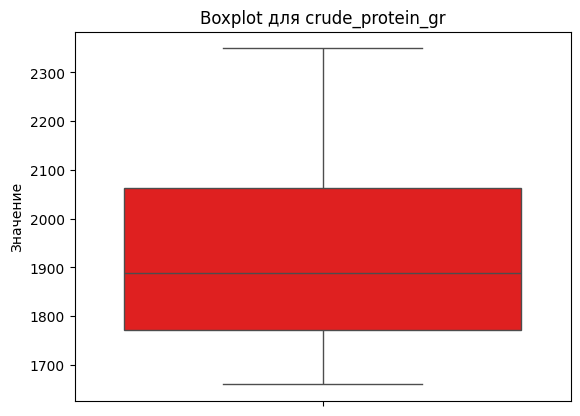

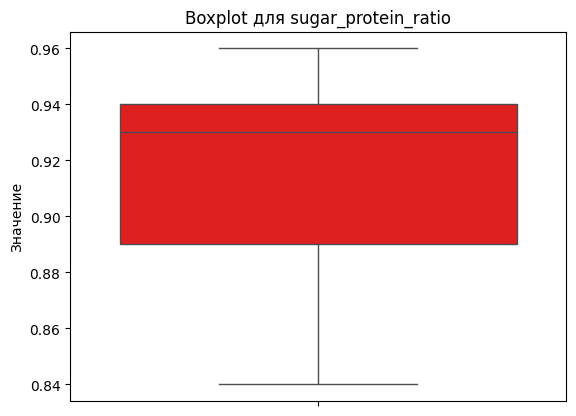

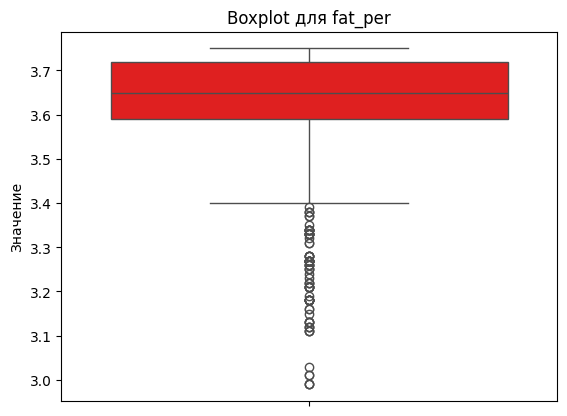

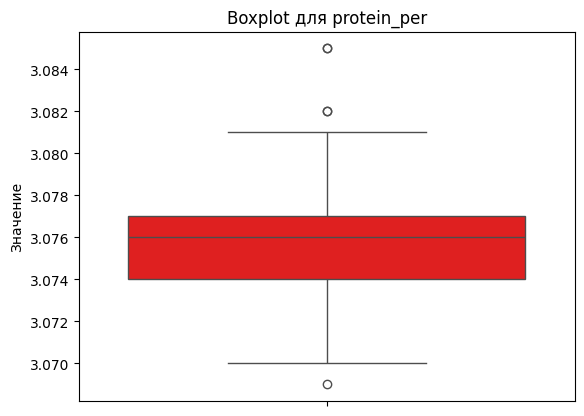

In [33]:
for column in df_ferma_main.columns:
    if column not in columns_to_exclude:
        plt.figure()
        sns.boxplot(y=df_ferma_main[column],color='red')
        plt.title(f'Boxplot для {column}')
        plt.ylabel('Значение')
plt.show()

---
#### Промежуточный вывод: 
Видны выбросы в  содержании жира в молоке, посмотрим, сколько их, при необходимости избавимся

---

In [34]:
fat_main_df = df_ferma_main.query('fat_per < 3.4')
print(len(fat_main_df))
print(len(fat_main_df)/len(df_ferma_main))

86
0.13694267515923567


14% данных, оставим как есть и не будем их трогать

----
#### По остальным признакам боксплоты и гистограммы не подойдут, а бар чарты будут как раз кстати

----

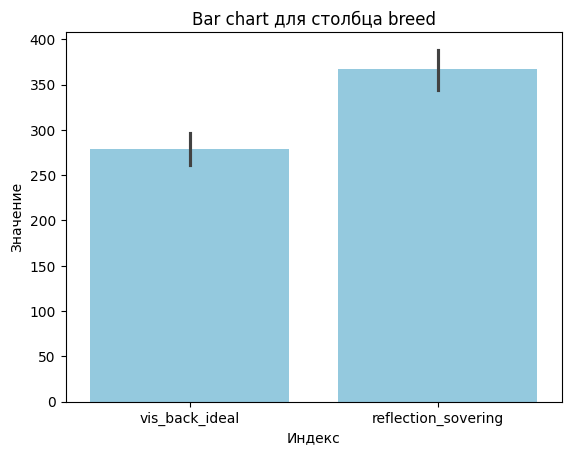

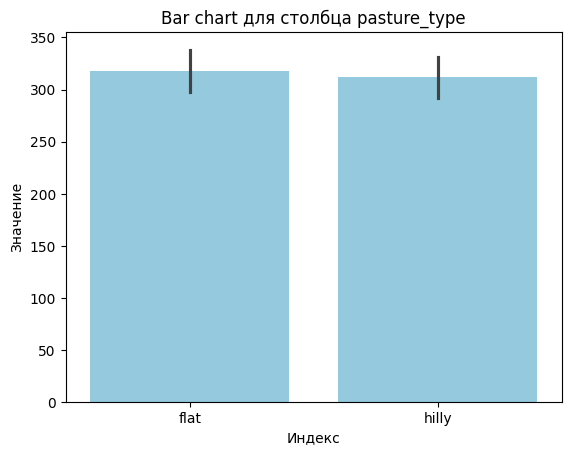

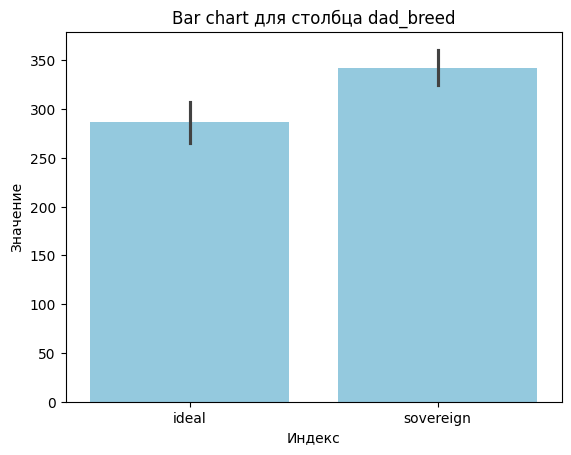

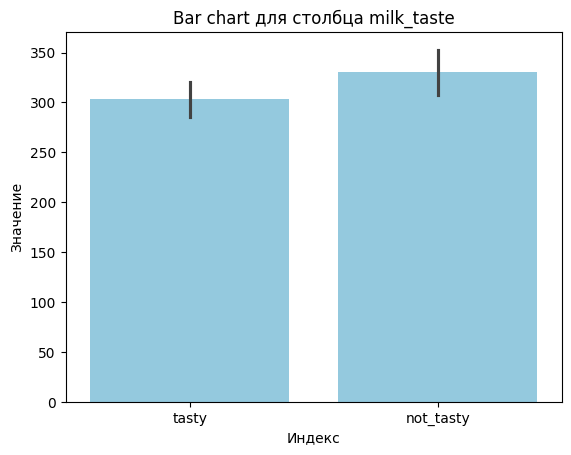

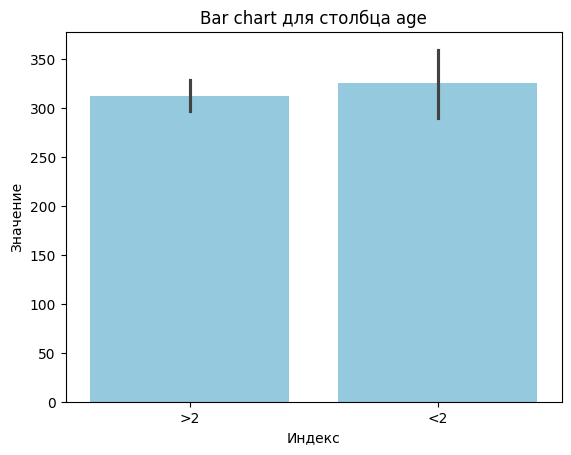

In [35]:
columns_to_exclude = ['breed', 'pasture_type', 'dad_breed', 'milk_taste', 'age']
for column in columns_to_exclude:
    plt.figure()  
    sns.barplot(x=df_ferma_main[column], y=df_ferma_main.index, color='skyblue')
    plt.title(f'Bar chart для столбца {column}')
    plt.xlabel('Индекс')
    plt.ylabel('Значение')
plt.show()

---
## Промежуточный вывод:

1. После заглушки, столбец удоя коров стал похож на нормальное распределение, чаще всего корова дает 6250кг молока
2. Средняя энергетическая кормовая единица около 15 единиц, если выражать в энергии - это 15 тысяч мегаджоулей
3. Среднее содержания сырого протеина в граммах составляет от 1800 до 2050гр
4. Среднее соотношение сахара к протеину составляет от 0,89 до 0,94
5. Средний показатель содержания жиров в молоке - 3.65%
6. Среднее содержания белка в молоке - 3.76%
7. Коров породы рефлекшн соверина примерно на 100 единиц больше чем поров вис бэк айдиал
8. Коров, на типах пастбищ которых они паслись, примерное одинаковое кол-во. Другими словами, коров, которые паслись на холмистых и равниных лугах почти одинаковое кол-во
9. Папы коров, порода которых была соверин, примерно на 60 больше, чем папы коров породы айдиал
10. Невкусного молока у коров немного больше, чем вкусного
11. Возраст коров, которым меньше 2-х лет, немного больше, чем тех, кто старше 2-х лет

#### С первым дата фреймом разобрались, переходим ко второму. Сразу можно сказать, что у второго датасета с именами пап коров есть только тип obj, поэтому просто построим бар чарт

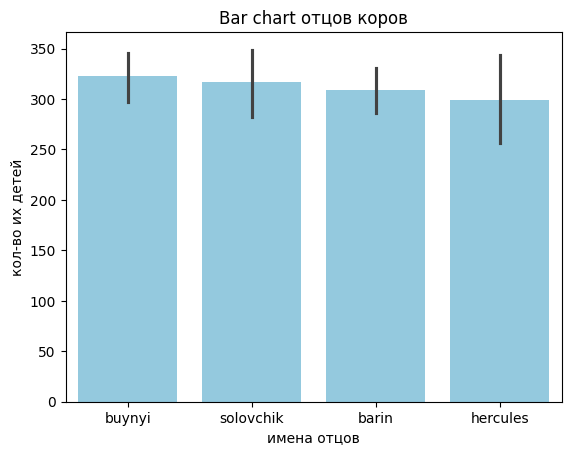

In [36]:
sns.barplot(x=df_ferma_dad['dad_name'], y=df_ferma_dad.index, color='skyblue')
plt.title(f'Bar chart отцов коров')
plt.xlabel('имена отцов')
plt.ylabel('кол-во их детей')
plt.show()

## Промежуточный вывод

По графику можно сказать, что больше всего детей у Буйного, а меньше всего у Геркулеса, второе место занимает Соловчик, а третье - Барин

#### Переходим к третьему датасету

Порода, тип пастбища, порода отца, имя отца и возраст не подойдут для анализа посредством гистограммы и боксплота, будем использовать бар чарты

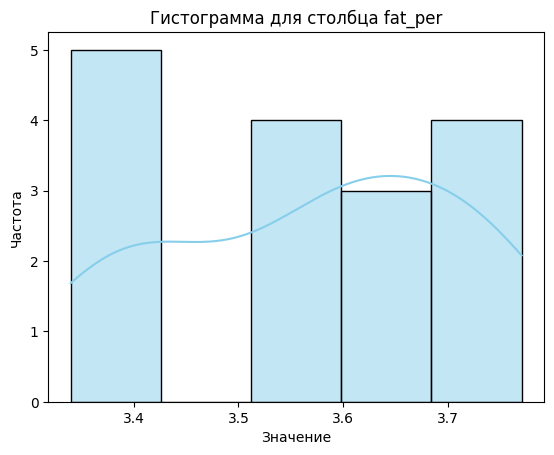

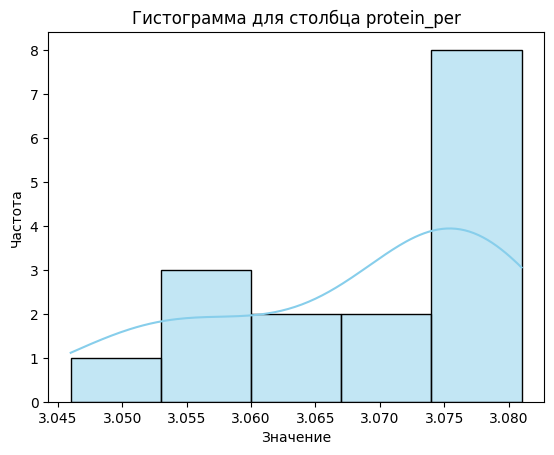

In [37]:
includes = ['id', 'breed', 'pasture_type', 'dad_breed','dad_name', 'age']
for column in df_cow_buy.columns:
    if column not in includes:
        plt.figure()
        sns.histplot(df_cow_buy[column], bins=5, kde=True, color='skyblue')
        plt.title(f'Гистограмма для столбца {column}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
plt.show()

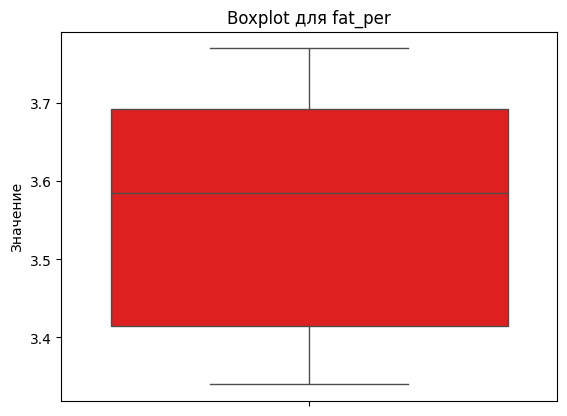

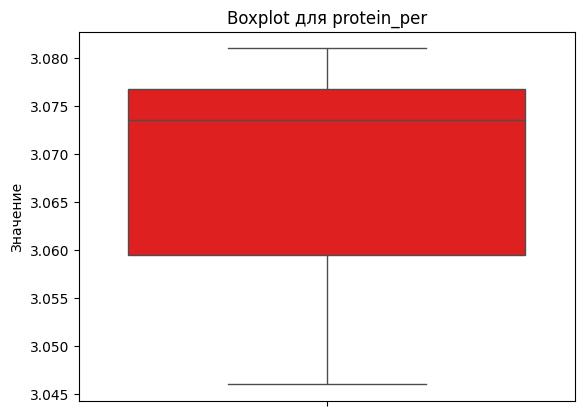

In [38]:
for column in df_cow_buy.columns:
    if column not in includes:
        plt.figure()
        sns.boxplot(y=df_cow_buy[column],color='red')
        plt.title(f'Boxplot для {column}')
        plt.ylabel('Значение')
plt.show()

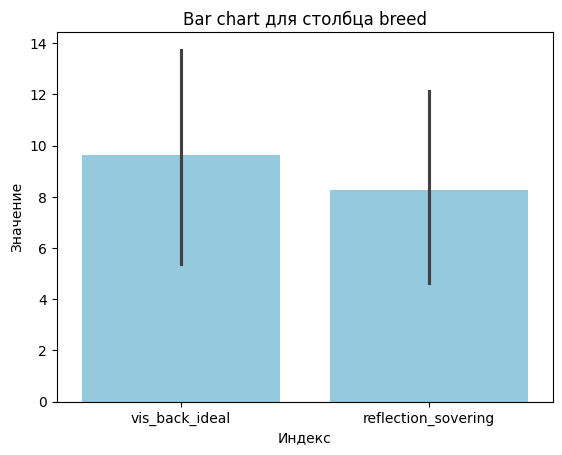

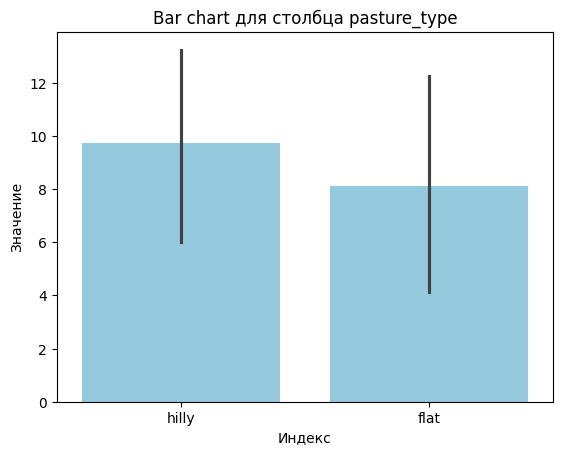

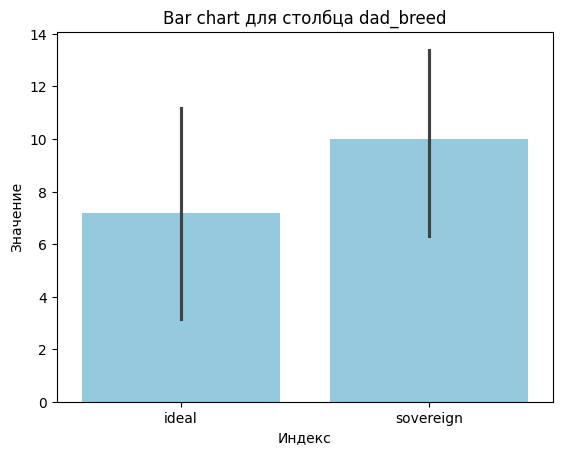

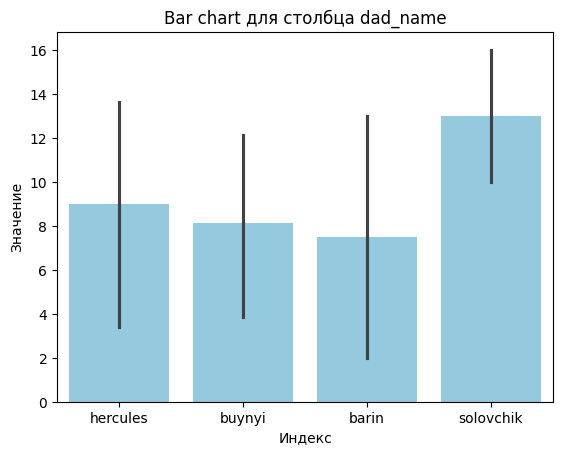

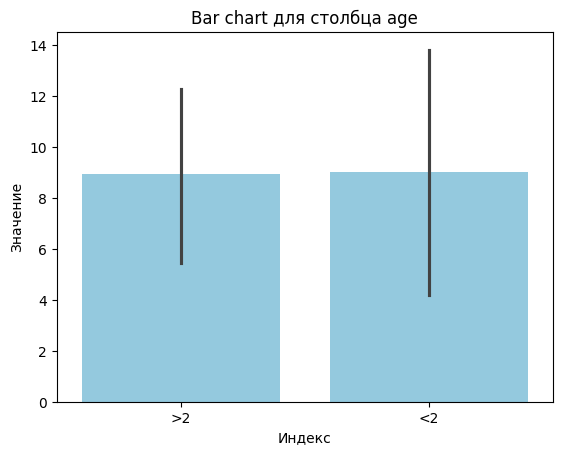

In [39]:
includes = ['breed', 'pasture_type', 'dad_breed','dad_name', 'age']
for column in includes:
    plt.figure()  
    sns.barplot(x=df_cow_buy[column], y=df_cow_buy.index, color='skyblue')
    plt.title(f'Bar chart для столбца {column}')
    plt.xlabel('Индекс')
    plt.ylabel('Значение')
plt.show()

---
<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; Промежуточный вывод:

По датафрейму о коровах "ЭкоФермы" можно сказать:

1. Чаще всего встречается коровы, которые дают молоко с содержанием жира в 3.4%
2. Чаще всего встречается коровы, которые дают молоко с содержанием бекла в 3.075%
3. Коров породы вис блэк больше на 1 единицу чем породы соверин
4. коров , которые паслись на равнинном пастбище, больше чем на холмистых
5. коров отцы которых породы айдиал больше, чем породы соверин
6. Больше всего коров  именем их отца - Соловчик, 2 место - отец с именем Геркулес, 3 Буйный, 4 - Барин
7. Коров кому больше и меньше 2-х лет - одинкаовое кол-во
<br><br>
</div>

---

---
# Общий вывод:

#### 1. Провели исследовательский анализ, по трем датасетам можно сказать (по количественным):

##### df_ferma_main
1.1. Распределение удоя коров, после заглушки, стал похож на нормальный, выбросов нет

1.2. Распределение энергетической кормовай единицы похоже на нормальное, со сдвигом вправо, выбросов нет

1.3. Распределение содержания сырого протеина в граммах ассимитричное со сдвигом влево, выбросов нет

1.4. Распределение соотношения сахара ассимитричное со сдвигом вправо, выбросов нет

1.5. Распределение показателя содержания жиров в молоке ассимитричное со сдвигом вправо, есть 86 выбросов, однако, это 14% от всех данных, их трогать не будем, тем более это содержание жира в молоке и процент меньше 3.4% - допустимое значение

1.6. Распределение содержания белка похоже на нормальное, однако есть несколько выбросов, трогать которые мы не будем, так как они имеют адекватные показатели.

##### df_cow_buy

1.7. Распределение содержания жира в молоке, по гистограмме ничего не будем говорить, оно ассимитрично и имеет два пика, но это все связано с не большим количеством данных, выбрососв нет.

1.8. Распределение белка в молоке ассимитричное со сдвигом вправо, выбросов нет

#### Теперь по категориальным признакам

##### df_ferma_main, df_cow_buy, df_ferma_dad
1.9. К категормальным признакам во все датасетах относятся - порода коров, тип пастбищ, порода папы, вкус молока, возраст, имена отцов.Все признаки вопросов не вызвывают, все похожи на нормальные данные


2. В 3 трех датасетах есть как количественные так и категориальные, все категориальные данные будем преобразовывть под бинарную систему, такие признаки как(порода, возраст, имя отца, тип пастбища и т.д.). Числовые же признаки преобразовывать не надо.



---

## Корреляционный анализ

---
#### Проведем корреляционный анализ датасета df_ferma_main, псмотрим на взаимосвязь всех признаков

---

---
<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; Так как у нас нормальное распределение только на признаке "удой" - вместо корреляции Пирсона, будем использовать корреляцию Спирмана
<br><br>
</div>

---

In [40]:
df_drop_id = df_ferma_main.drop(['id'], axis=1)

numeric_df = df_drop_id.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr(method='spearman')
display(correlation_matrix)

yield_kg       efu  crude_protein_gr  \
yield_kg             1.000000  0.765144          0.437543   
efu                  0.765144  1.000000          0.384747   
crude_protein_gr     0.437543  0.384747          1.000000   
sugar_protein_ratio  0.787904  0.741962          0.485890   
fat_per              0.688506  0.686973          0.392822   
protein_per         -0.005701 -0.013321          0.229051   

                     sugar_protein_ratio   fat_per  protein_per  
yield_kg                        0.787904  0.688506    -0.005701  
efu                             0.741962  0.686973    -0.013321  
crude_protein_gr                0.485890  0.392822     0.229051  
sugar_protein_ratio             1.000000  0.701044     0.109924  
fat_per                         0.701044  1.000000     0.043125  
protein_per                     0.109924  0.043125     1.000000

#### Рассмотрим матрицу, которая будет красивее и удобнее для анализа

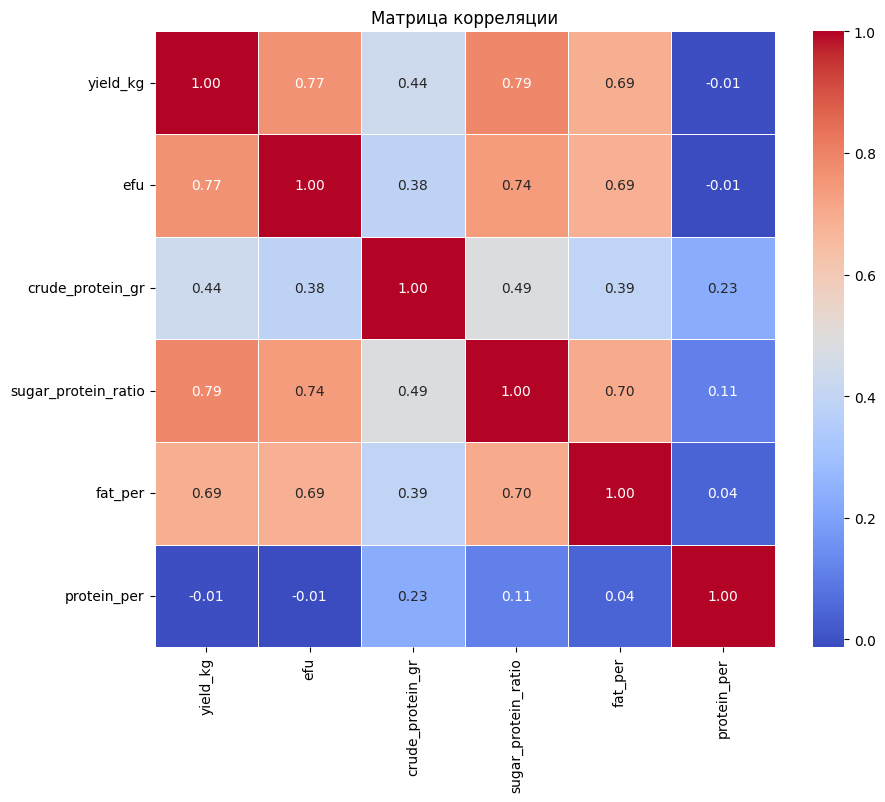

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Матрица корреляции')
plt.show()

<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; Промежуточный вывод:

1. Есть сильная взаимосвязь между удоем и энергетической кормовой единицей, то есть, чем больше ест корова, тем больше молока она дает и обратно
2. Также есть сильная свзяь между соотношением сахара в корме коровы и удоем, то есть, чем больше сахара находится в корме коровы, тем больше удоя она дает
3. Есть связь между содержанием жира в молоке и удоем, но эта связь бесмысленна, так как жирность молока, никак не может повлиять на удой.
4. Есть сильная связь между соотношением сахара в корме и энергетической кормовой единицей, но это просто логично, соотношение сахара в корме и сам корм напрямую зависят друг от друга
5. Есть связь между процентом жира в молоке и энергетической кормовой единицей, то есть, чем больше ест корова, тем жирнее молоко
<br><br>
</div>



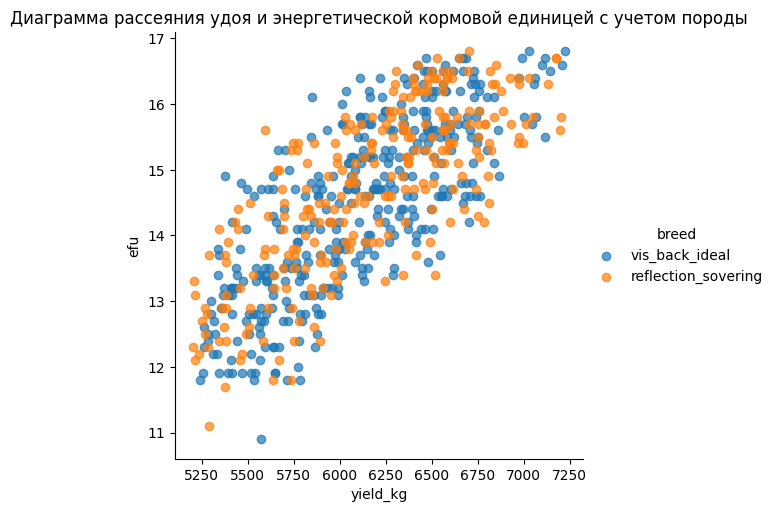

Коэффициент корреляции между удоем и энергетической кормовой единицей для разных пород: breed
reflection_sovering    0.755034
vis_back_ideal         0.766858
Name: efu, dtype: float64


In [42]:
yield_by_breed_efu = df_ferma_main.groupby('breed')[['yield_kg', 'efu']].corr(method='spearman').unstack()['yield_kg']['efu']
sns.lmplot(x='yield_kg', y='efu', hue='breed', data=df_ferma_main, fit_reg=False, scatter_kws={'alpha':0.7})
plt.title('Диаграмма рассеяния удоя и энергетической кормовой единицей с учетом породы')
plt.show()
print('Коэффициент корреляции между удоем и энергетической кормовой единицей для разных пород:', yield_by_breed_efu)

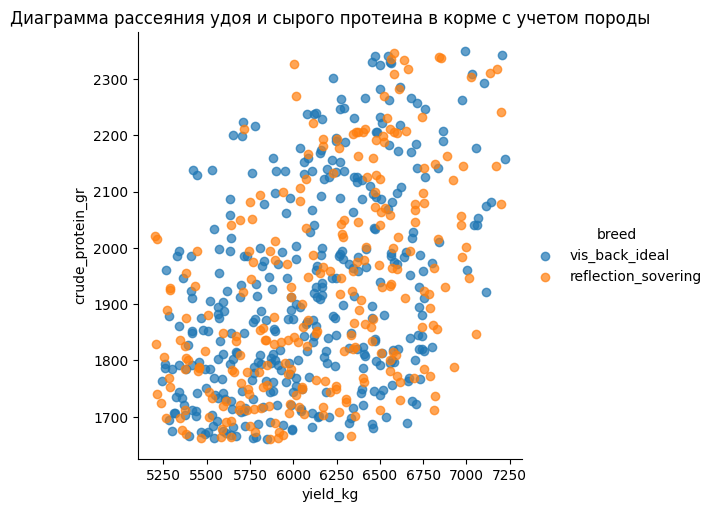

Коэффициент корреляции между удоем и сырым протеином в корме для разных пород: breed
reflection_sovering    0.483255
vis_back_ideal         0.410031
Name: crude_protein_gr, dtype: float64


In [43]:
yield_by_breed_crude = df_ferma_main.groupby('breed')[['yield_kg', 'crude_protein_gr']].corr(method='spearman').unstack()['yield_kg']['crude_protein_gr']
sns.lmplot(x='yield_kg', y='crude_protein_gr', hue='breed', data=df_ferma_main, fit_reg=False, scatter_kws={'alpha':0.7})
plt.title('Диаграмма рассеяния удоя и сырого протеина в корме с учетом породы')
plt.show()
print('Коэффициент корреляции между удоем и сырым протеином в корме для разных пород:', yield_by_breed_crude)

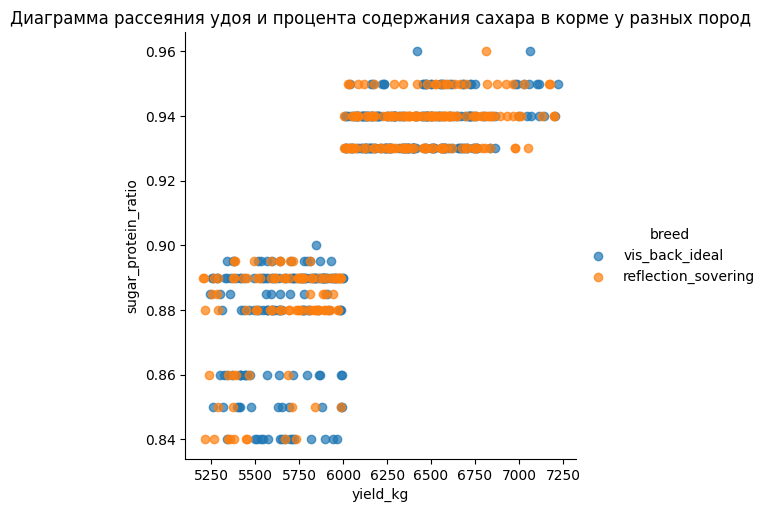

Коэффициент корреляции между удоем и процента содержания сахара в корме разных пород: breed
reflection_sovering    0.774411
vis_back_ideal         0.792489
Name: sugar_protein_ratio, dtype: float64


In [44]:
yield_by_breed_sugar_ratio = df_ferma_main.groupby('breed')[['yield_kg', 'sugar_protein_ratio']].corr(method='spearman').unstack()['yield_kg']['sugar_protein_ratio']
sns.lmplot(x='yield_kg', y='sugar_protein_ratio', hue='breed', data=df_ferma_main, fit_reg=False, scatter_kws={'alpha':0.7})
plt.title('Диаграмма рассеяния удоя и процента содержания сахара в корме у разных пород')
plt.show()
print('Коэффициент корреляции между удоем и процента содержания сахара в корме разных пород:', yield_by_breed_sugar_ratio)

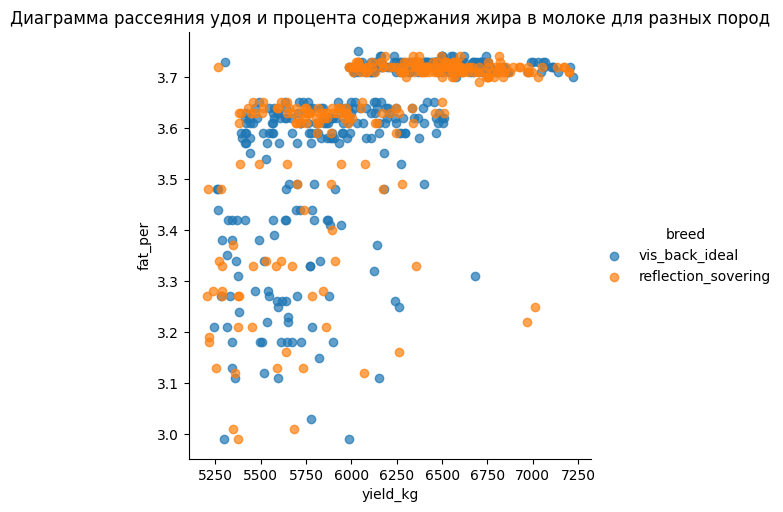

Коэффициент корреляции между удоем и процентом содержания жира в молоке для разных пород: breed
reflection_sovering    0.644269
vis_back_ideal         0.711751
Name: fat_per, dtype: float64


In [45]:
yield_by_breed_fat_per = df_ferma_main.groupby('breed')[['yield_kg', 'fat_per']].corr(method='spearman').unstack()['yield_kg']['fat_per']
sns.lmplot(x='yield_kg', y='fat_per', hue='breed', data=df_ferma_main, fit_reg=False, scatter_kws={'alpha':0.7})
plt.title('Диаграмма рассеяния удоя и процента содержания жира в молоке для разных пород')
plt.show()
print('Коэффициент корреляции между удоем и процентом содержания жира в молоке для разных пород:', yield_by_breed_fat_per)

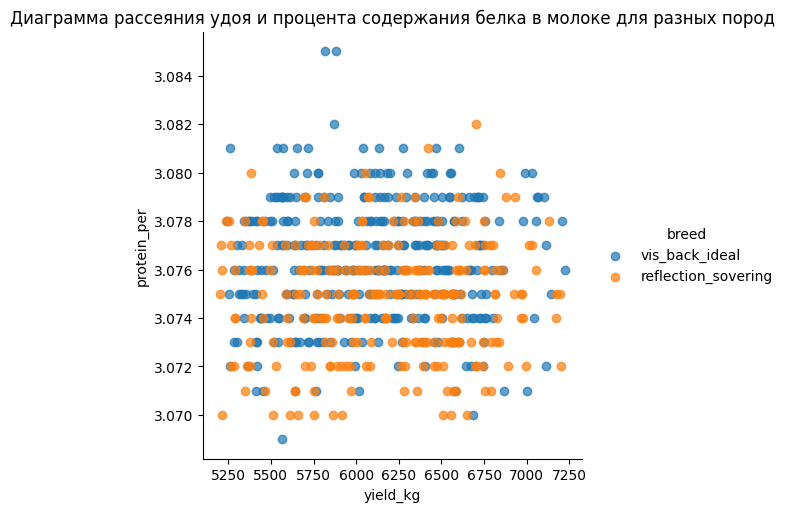

Коэффициент корреляции между удоем и содержанием белка в молоке для разных пород: breed
reflection_sovering    0.008787
vis_back_ideal         0.024250
Name: protein_per, dtype: float64


In [46]:
yield_by_breed_protein_per = df_ferma_main.groupby('breed')[['yield_kg', 'protein_per']].corr(method='spearman').unstack()['yield_kg']['protein_per']
sns.lmplot(x='yield_kg', y='protein_per', hue='breed', data=df_ferma_main, fit_reg=False, scatter_kws={'alpha':0.7})
plt.title('Диаграмма рассеяния удоя и процента содержания белка в молоке для разных пород')
plt.show()
print('Коэффициент корреляции между удоем и содержанием белка в молоке для разных пород:', yield_by_breed_protein_per)

<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; Промежуточный вывод:

1. Коэффициент корреляции между удоем и энергетической кормовой единицей для двух пород практически одинковая, график рассеяния и сам коэффициенты для обоих случаев показывает сильную связь, как и было сказано раннее, чем больше ест корова, тем больше получаем молока для двух пород.
2. Коэффициент корреляции между удоем и сырым протеином в корме для разных пород, не значительный, есть небольшая связь, то же можно сказать по графику рассеивания, коэфициент 0,48 для вис бэка и 0,41 для соверин пород
3. Коэффициент корреляции между удоем и процента содержания сахара в корме разных пород очень сильный 0,77 для породы соверин, и 0,79 для вис бэк, однако график рассеивания не похож на типичный график, можно видеть горизонтальные линии, факторы, которые повлияли на это могли бы быть разные, но я свожусь ко мнению, что это практически категироиальный признак, то есть в датасетах было много процентного соотношения именно с одной цифрой, как видно по графику, именно при соотношении сахара в 0,94 больше всего выходит удоя.
4. Коэффициент корреляции между удоем и процентом содержания жира в молоке для вис бэк 0,64 и 0,71 для соверин, на графике рассеяния снова видны горизонтальные линии, в целом, т.к коэфициенты хорошие, можно сделать такой вывод: т.к мы уже узнали, что есть сильная связь между тем, сколько кушает корова, и сколько молока она дает, соотвестенно, чем больше эта же корова дает молока растет и процент жира в молоке.
5. Коэффициент корреляции между удоем и содержанием белка в молоке для вис бэка 0.01 и для соверина 0.02, и коэфициенты и график показывают отсутствие связи
<br><br>
</div>

#### Теперь посмотрим в разрезе от типа пастбищ

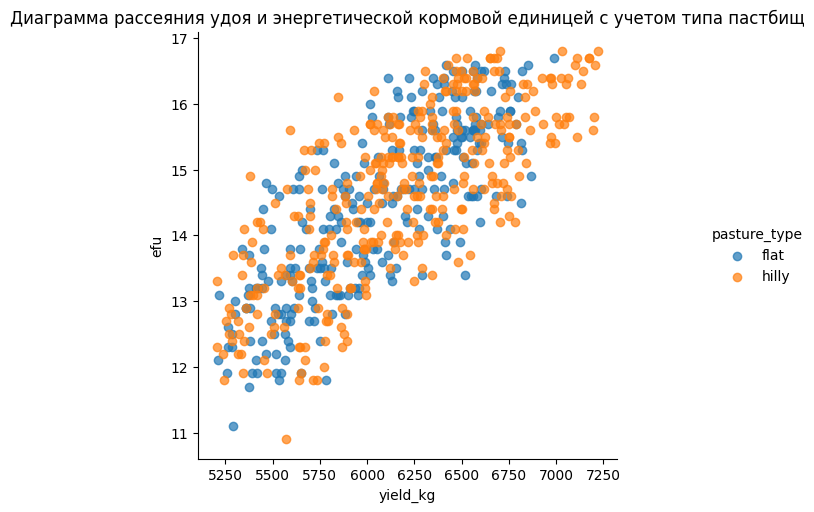

Коэффициент корреляции между удоем и энергетической кормовой единицей с разным типом пастбищ: pasture_type
flat     0.785159
hilly    0.745249
Name: efu, dtype: float64


In [47]:
yield_by_pasture_efu = df_ferma_main.groupby('pasture_type')[['yield_kg', 'efu']].corr(method='spearman').unstack()['yield_kg']['efu']
sns.lmplot(x='yield_kg', y='efu', hue='pasture_type', data=df_ferma_main, fit_reg=False, scatter_kws={'alpha':0.7})
plt.title('Диаграмма рассеяния удоя и энергетической кормовой единицей с учетом типа пастбищ')
plt.show()
print('Коэффициент корреляции между удоем и энергетической кормовой единицей с разным типом пастбищ:', yield_by_pasture_efu)

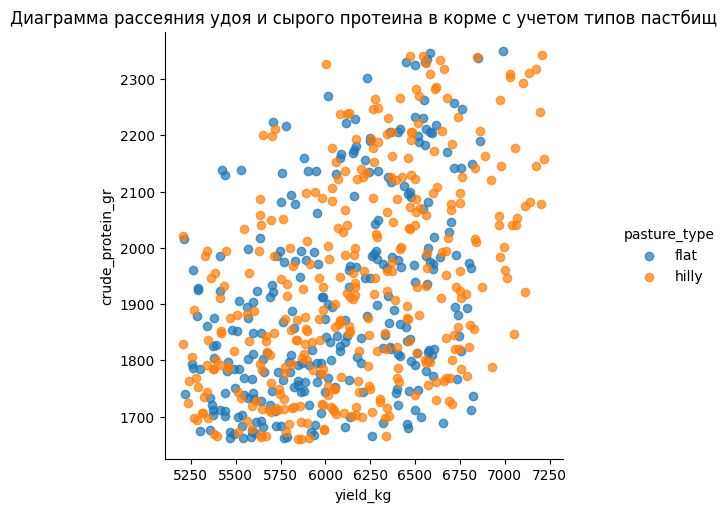

Коэффициент корреляции между удоем и сырым протеином в корме для разных типов пастбищ: pasture_type
flat     0.404956
hilly    0.459787
Name: crude_protein_gr, dtype: float64


In [48]:
yield_by_pasture_crude = df_ferma_main.groupby('pasture_type')[['yield_kg', 'crude_protein_gr']].corr(method='spearman').unstack()['yield_kg']['crude_protein_gr']
sns.lmplot(x='yield_kg', y='crude_protein_gr', hue='pasture_type', data=df_ferma_main, fit_reg=False, scatter_kws={'alpha':0.7})
plt.title('Диаграмма рассеяния удоя и сырого протеина в корме с учетом типов пастбищ')
plt.show()
print('Коэффициент корреляции между удоем и сырым протеином в корме для разных типов пастбищ:', yield_by_pasture_crude)

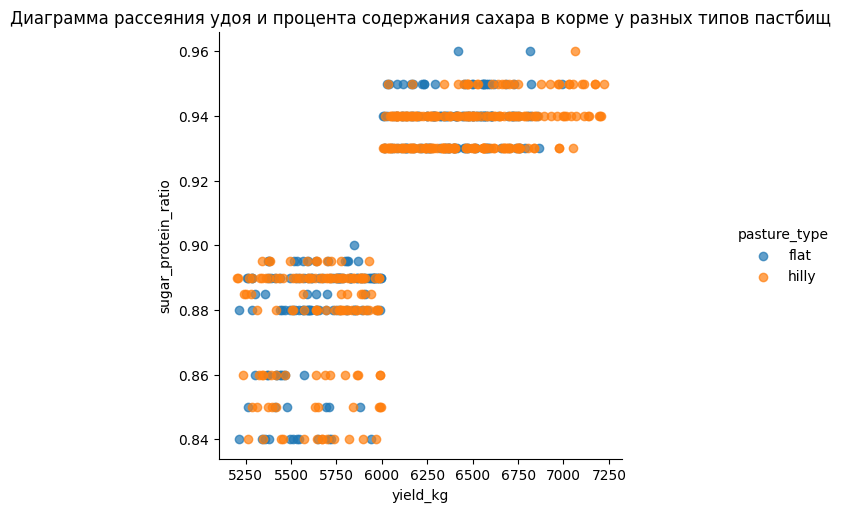

Коэффициент корреляции между удоем и процента содержания сахара в корме на разных типах пастбищ: pasture_type
flat     0.809637
hilly    0.773511
Name: sugar_protein_ratio, dtype: float64


In [49]:
yield_by_pasture_sugar_ratio = df_ferma_main.groupby('pasture_type')[['yield_kg', 'sugar_protein_ratio']].corr(method='spearman').unstack()['yield_kg']['sugar_protein_ratio']
sns.lmplot(x='yield_kg', y='sugar_protein_ratio', hue='pasture_type', data=df_ferma_main, fit_reg=False, scatter_kws={'alpha':0.7})
plt.title('Диаграмма рассеяния удоя и процента содержания сахара в корме у разных типов пастбищ')
plt.show()
print('Коэффициент корреляции между удоем и процента содержания сахара в корме на разных типах пастбищ:', yield_by_pasture_sugar_ratio)

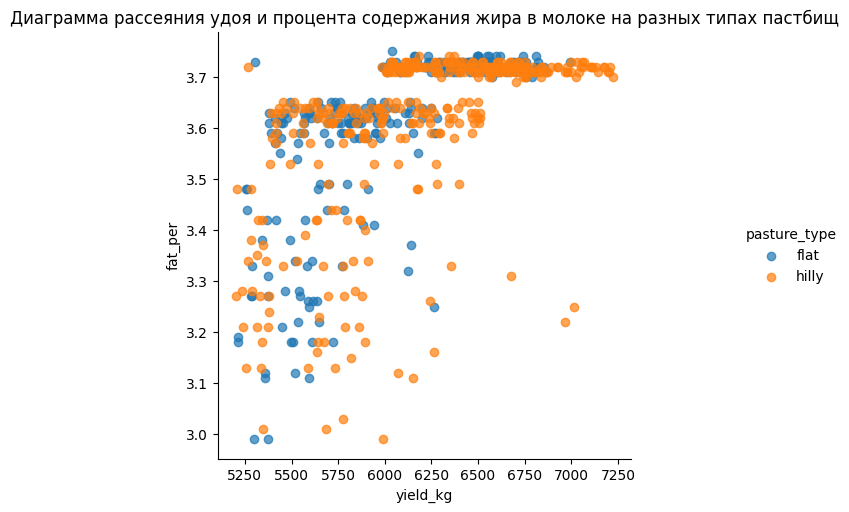

Коэффициент корреляции между удоем и процентом содержания жира в молоке на разных типах пастбищ: pasture_type
flat     0.783316
hilly    0.627097
Name: fat_per, dtype: float64


In [50]:
yield_by_pasture_fat_per = df_ferma_main.groupby('pasture_type')[['yield_kg', 'fat_per']].corr(method='spearman').unstack()['yield_kg']['fat_per']
sns.lmplot(x='yield_kg', y='fat_per', hue='pasture_type', data=df_ferma_main, fit_reg=False, scatter_kws={'alpha':0.7})
plt.title('Диаграмма рассеяния удоя и процента содержания жира в молоке на разных типах пастбищ')
plt.show()
print('Коэффициент корреляции между удоем и процентом содержания жира в молоке на разных типах пастбищ:', yield_by_pasture_fat_per)

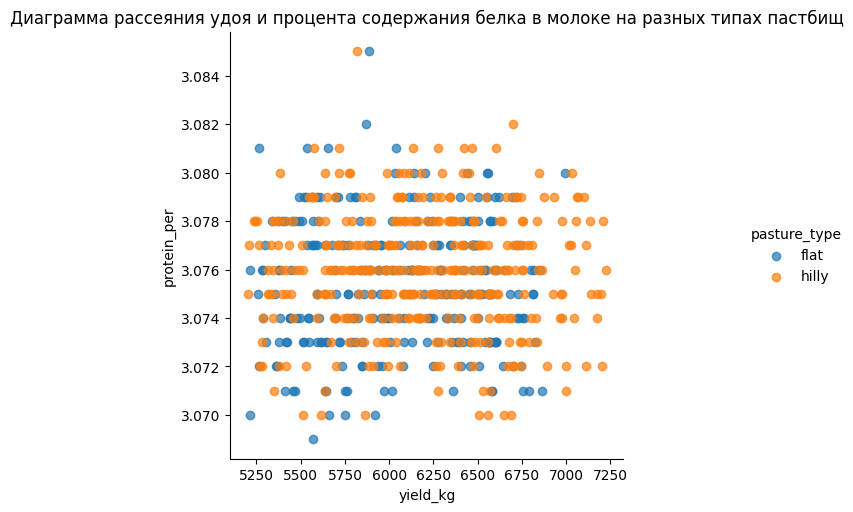

Коэффициент корреляции между удоем и содержанием белка в молоке на разных типах пастбищ: pasture_type
flat     0.006501
hilly   -0.034365
Name: protein_per, dtype: float64


In [51]:
yield_by_pasture_protein_per = df_ferma_main.groupby('pasture_type')[['yield_kg', 'protein_per']].corr(method='spearman').unstack()['yield_kg']['protein_per']
sns.lmplot(x='yield_kg', y='protein_per', hue='pasture_type', data=df_ferma_main, fit_reg=False, scatter_kws={'alpha':0.7})
plt.title('Диаграмма рассеяния удоя и процента содержания белка в молоке на разных типах пастбищ')
plt.show()
print('Коэффициент корреляции между удоем и содержанием белка в молоке на разных типах пастбищ:', yield_by_pasture_protein_per)

<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; Промежуточный вывод:

Ситуация по коэфициентам практически не изменилась, графики рассеяния также это подтверждают, расмотрм дальнейшие категориальные признаки
<br><br>
</div>

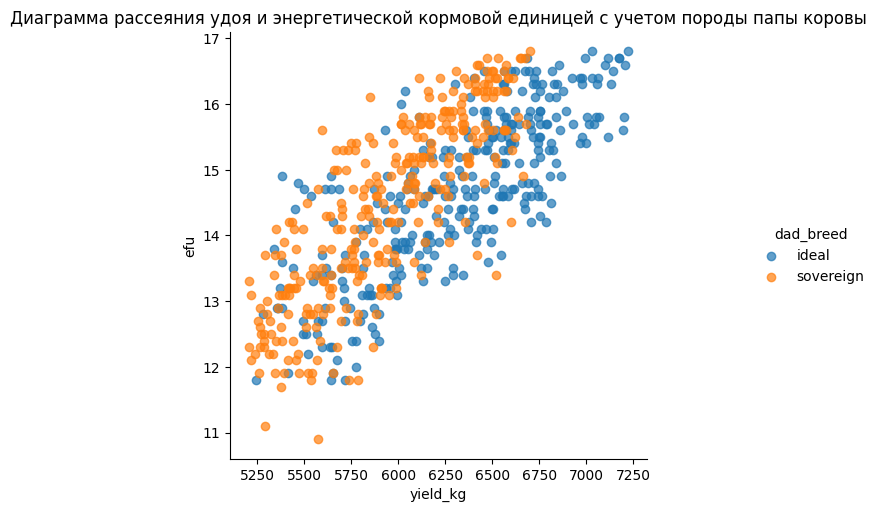

Коэффициент корреляции между удоем и энергетической кормовой единицей с разными пород пап коров: dad_breed
ideal        0.781333
sovereign    0.823710
Name: efu, dtype: float64


In [52]:
yield_by_dadbreed_efu = df_ferma_main.groupby('dad_breed')[['yield_kg', 'efu']].corr(method='spearman').unstack()['yield_kg']['efu']
sns.lmplot(x='yield_kg', y='efu', hue='dad_breed', data=df_ferma_main, fit_reg=False, scatter_kws={'alpha':0.7})
plt.title('Диаграмма рассеяния удоя и энергетической кормовой единицей с учетом породы папы коровы')
plt.show()
print('Коэффициент корреляции между удоем и энергетической кормовой единицей с разными пород пап коров:', yield_by_dadbreed_efu)

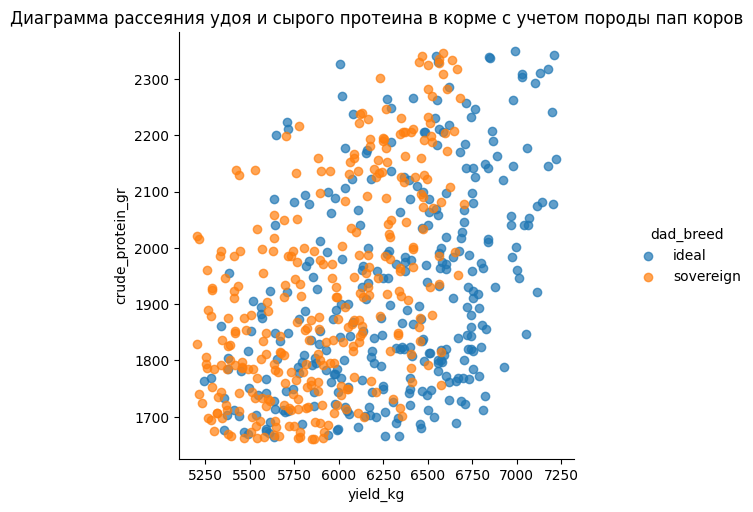

Коэффициент корреляции между удоем и сырым протеином в корме для разных пород пап коров: dad_breed
ideal        0.422943
sovereign    0.529657
Name: crude_protein_gr, dtype: float64


In [53]:
yield_by_dadbreed_crude = df_ferma_main.groupby('dad_breed')[['yield_kg', 'crude_protein_gr']].corr(method='spearman').unstack()['yield_kg']['crude_protein_gr']
sns.lmplot(x='yield_kg', y='crude_protein_gr', hue='dad_breed', data=df_ferma_main, fit_reg=False, scatter_kws={'alpha':0.7})
plt.title('Диаграмма рассеяния удоя и сырого протеина в корме с учетом породы пап коров')
plt.show()
print('Коэффициент корреляции между удоем и сырым протеином в корме для разных пород пап коров:', yield_by_dadbreed_crude)

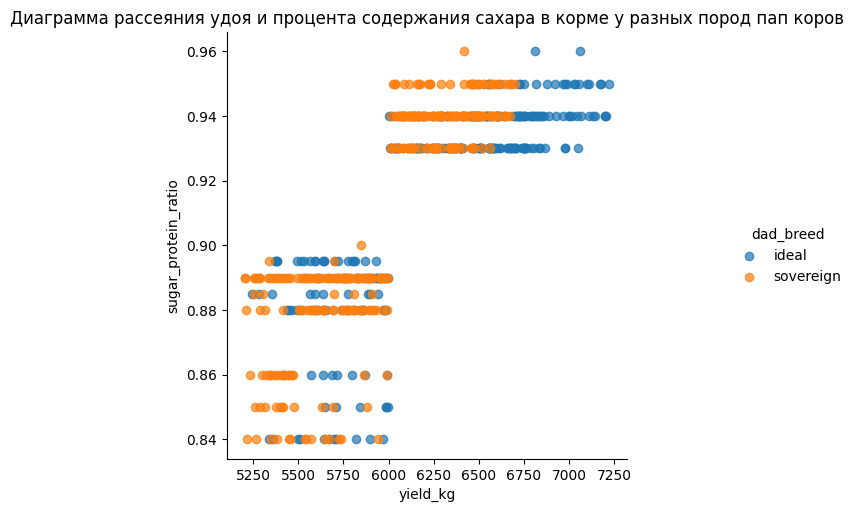

Коэффициент корреляции между удоем и процента содержания сахара в корме у разных пород пап коров: dad_breed
ideal        0.758829
sovereign    0.816819
Name: sugar_protein_ratio, dtype: float64


In [54]:
yield_by_dadbreed_sugar_ratio = df_ferma_main.groupby('dad_breed')[['yield_kg', 'sugar_protein_ratio']].corr(method='spearman').unstack()['yield_kg']['sugar_protein_ratio']
sns.lmplot(x='yield_kg', y='sugar_protein_ratio', hue='dad_breed', data=df_ferma_main, fit_reg=False, scatter_kws={'alpha':0.7})
plt.title('Диаграмма рассеяния удоя и процента содержания сахара в корме у разных пород пап коров')
plt.show()
print('Коэффициент корреляции между удоем и процента содержания сахара в корме у разных пород пап коров:', yield_by_dadbreed_sugar_ratio)

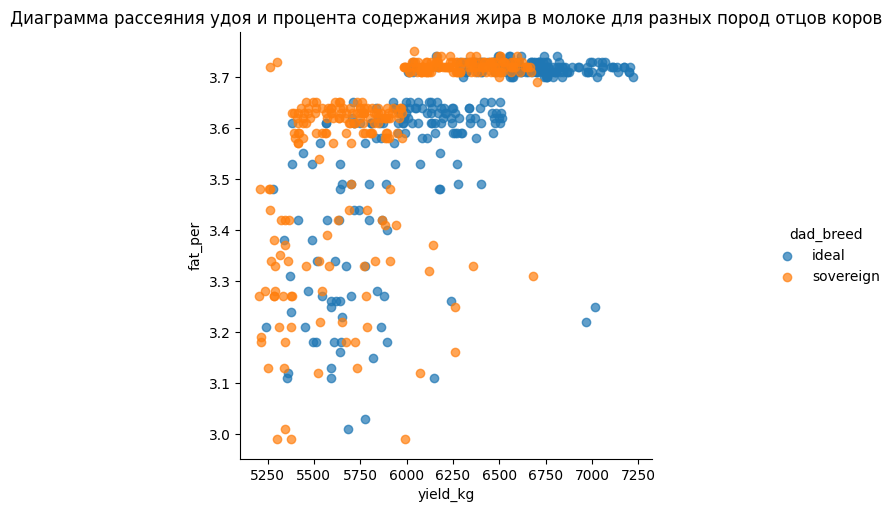

Коэффициент корреляции между удоем и процентом содержания жира в молоке для разных пород отцов коров: dad_breed
ideal        0.730129
sovereign    0.733697
Name: fat_per, dtype: float64


In [55]:
yield_by_dadbreed_fat_per = df_ferma_main.groupby('dad_breed')[['yield_kg', 'fat_per']].corr(method='spearman').unstack()['yield_kg']['fat_per']
sns.lmplot(x='yield_kg', y='fat_per', hue='dad_breed', data=df_ferma_main, fit_reg=False, scatter_kws={'alpha':0.7})
plt.title('Диаграмма рассеяния удоя и процента содержания жира в молоке для разных пород отцов коров')
plt.show()
print('Коэффициент корреляции между удоем и процентом содержания жира в молоке для разных пород отцов коров:', yield_by_dadbreed_fat_per)

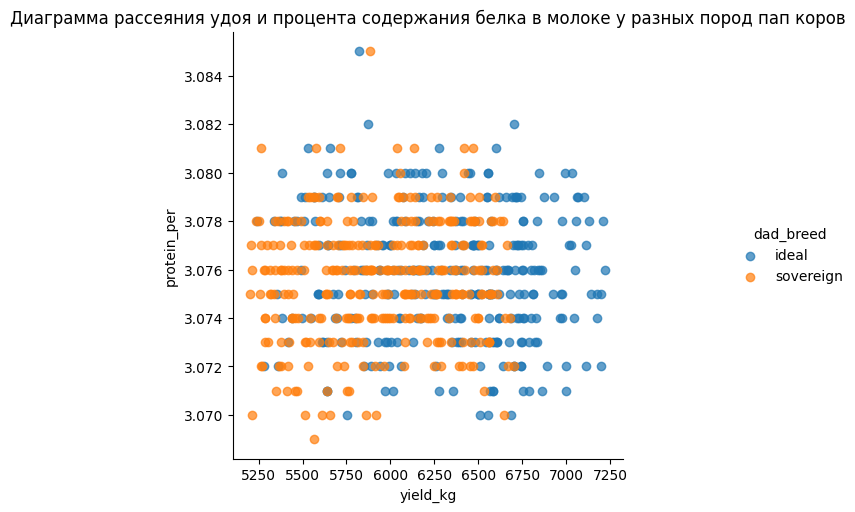

Коэффициент корреляции между удоем и содержанием белка у разных пород пап коров: dad_breed
ideal       -0.096428
sovereign    0.063890
Name: protein_per, dtype: float64


In [56]:
yield_by_dadbreed_protein_per = df_ferma_main.groupby('dad_breed')[['yield_kg', 'protein_per']].corr(method='spearman').unstack()['yield_kg']['protein_per']
sns.lmplot(x='yield_kg', y='protein_per', hue='dad_breed', data=df_ferma_main, fit_reg=False, scatter_kws={'alpha':0.7})
plt.title('Диаграмма рассеяния удоя и процента содержания белка в молоке у разных пород пап коров')
plt.show()
print('Коэффициент корреляции между удоем и содержанием белка у разных пород пап коров:', yield_by_dadbreed_protein_per)

<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; Промежуточный вывод:

Ситуация по коэфициентам практически не изменилась, графики рассеяния также это подтверждают, расмотрм дальнейшие категориальные признаки
<br><br>
</div>

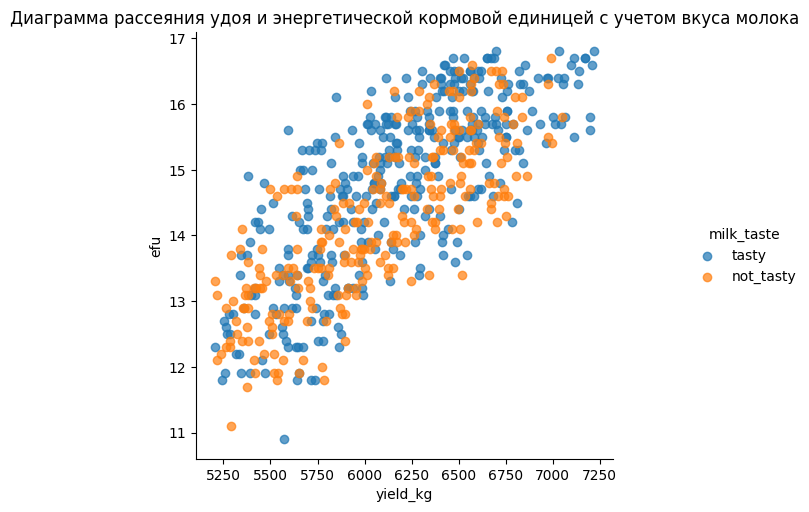

Коэффициент корреляции между удоем и энергетической кормовой единицей с учетом вкуса молока: milk_taste
not_tasty    0.794565
tasty        0.754669
Name: efu, dtype: float64


In [57]:
yield_by_taste_efu = df_ferma_main.groupby('milk_taste')[['yield_kg', 'efu']].corr(method='spearman').unstack()['yield_kg']['efu']
sns.lmplot(x='yield_kg', y='efu', hue='milk_taste', data=df_ferma_main, fit_reg=False, scatter_kws={'alpha':0.7})
plt.title('Диаграмма рассеяния удоя и энергетической кормовой единицей с учетом вкуса молока')
plt.show()
print('Коэффициент корреляции между удоем и энергетической кормовой единицей с учетом вкуса молока:', yield_by_taste_efu)

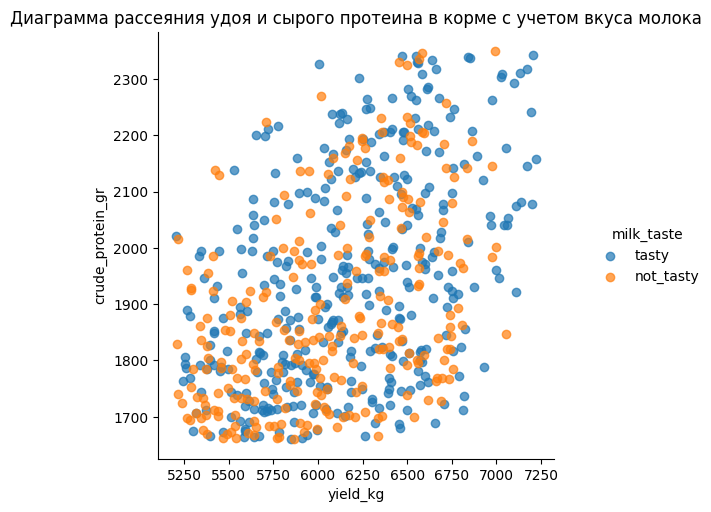

Коэффициент корреляции между удоем и сырым протеином в корме с учетом вкуса молока: milk_taste
not_tasty    0.438077
tasty        0.426568
Name: crude_protein_gr, dtype: float64


In [58]:
yield_by_taste_crude = df_ferma_main.groupby('milk_taste')[['yield_kg', 'crude_protein_gr']].corr(method='spearman').unstack()['yield_kg']['crude_protein_gr']
sns.lmplot(x='yield_kg', y='crude_protein_gr', hue='milk_taste', data=df_ferma_main, fit_reg=False, scatter_kws={'alpha':0.7})
plt.title('Диаграмма рассеяния удоя и сырого протеина в корме с учетом вкуса молока')
plt.show()
print('Коэффициент корреляции между удоем и сырым протеином в корме с учетом вкуса молока:', yield_by_taste_crude)

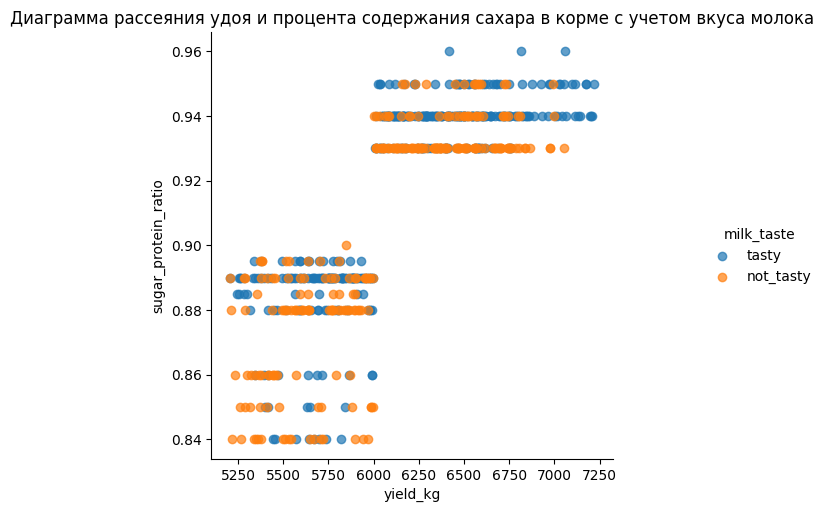

Коэффициент корреляции между удоем и процента содержания сахара в корме с учетом вкуса молока: milk_taste
not_tasty    0.798951
tasty        0.790906
Name: sugar_protein_ratio, dtype: float64


In [59]:
yield_by_taste_sugar_ratio = df_ferma_main.groupby('milk_taste')[['yield_kg', 'sugar_protein_ratio']].corr(method='spearman').unstack()['yield_kg']['sugar_protein_ratio']
sns.lmplot(x='yield_kg', y='sugar_protein_ratio', hue='milk_taste', data=df_ferma_main, fit_reg=False, scatter_kws={'alpha':0.7})
plt.title('Диаграмма рассеяния удоя и процента содержания сахара в корме с учетом вкуса молока')
plt.show()
print('Коэффициент корреляции между удоем и процента содержания сахара в корме с учетом вкуса молока:', yield_by_taste_sugar_ratio)

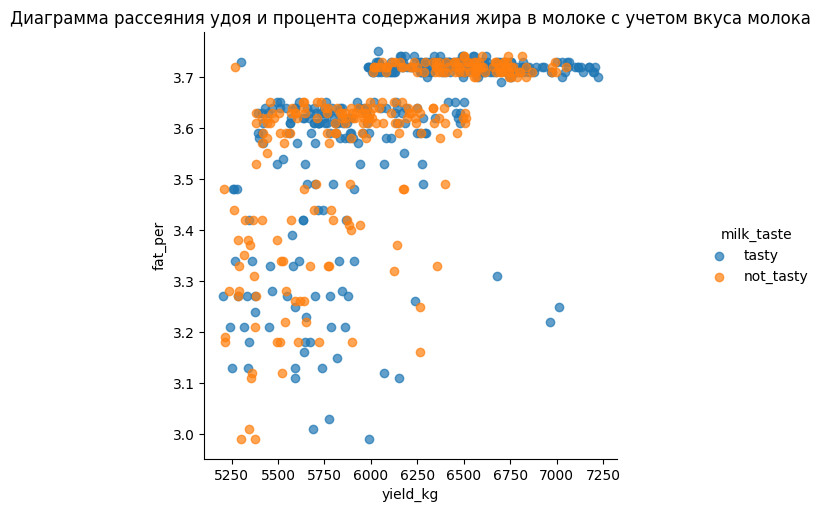

Коэффициент корреляции между удоем и процентом содержания жира в молоке с учетом вкуса молока: milk_taste
not_tasty    0.721866
tasty        0.652139
Name: fat_per, dtype: float64


In [60]:
yield_by_taste_fat_per = df_ferma_main.groupby('milk_taste')[['yield_kg', 'fat_per']].corr(method='spearman').unstack()['yield_kg']['fat_per']
sns.lmplot(x='yield_kg', y='fat_per', hue='milk_taste', data=df_ferma_main, fit_reg=False, scatter_kws={'alpha':0.7})
plt.title('Диаграмма рассеяния удоя и процента содержания жира в молоке с учетом вкуса молока')
plt.show()
print('Коэффициент корреляции между удоем и процентом содержания жира в молоке с учетом вкуса молока:', yield_by_taste_fat_per)

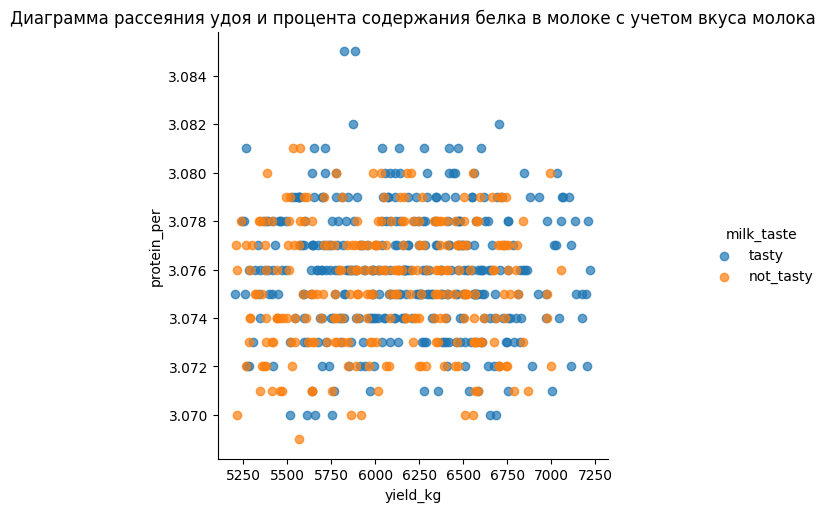

Коэффициент корреляции между удоем и содержанием белка с учетом вкуса молока: milk_taste
not_tasty    0.037941
tasty       -0.057604
Name: protein_per, dtype: float64


In [61]:
yield_by_taste_protein_per = df_ferma_main.groupby('milk_taste')[['yield_kg', 'protein_per']].corr(method='spearman').unstack()['yield_kg']['protein_per']
sns.lmplot(x='yield_kg', y='protein_per', hue='milk_taste', data=df_ferma_main, fit_reg=False, scatter_kws={'alpha':0.7})
plt.title('Диаграмма рассеяния удоя и процента содержания белка в молоке с учетом вкуса молока')
plt.show()
print('Коэффициент корреляции между удоем и содержанием белка с учетом вкуса молока:', yield_by_taste_protein_per)

<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; Промежуточный вывод:

Ситуация по коэфициентам практически не изменилась, графики рассеяния также это подтверждают, расмотрм последний категориальный признак-возраст. Однако, есть наблюдение, что начиная с увелечением процентного содержания сахара - улучшается вкус молока, при 0,96 было только вкусное молоко, при 0,95 превосходствовало вкусное молоко, при 0,94 они практически одинаковы, при 0,93 превосходствует невкусное молоко
<br><br>
</div>

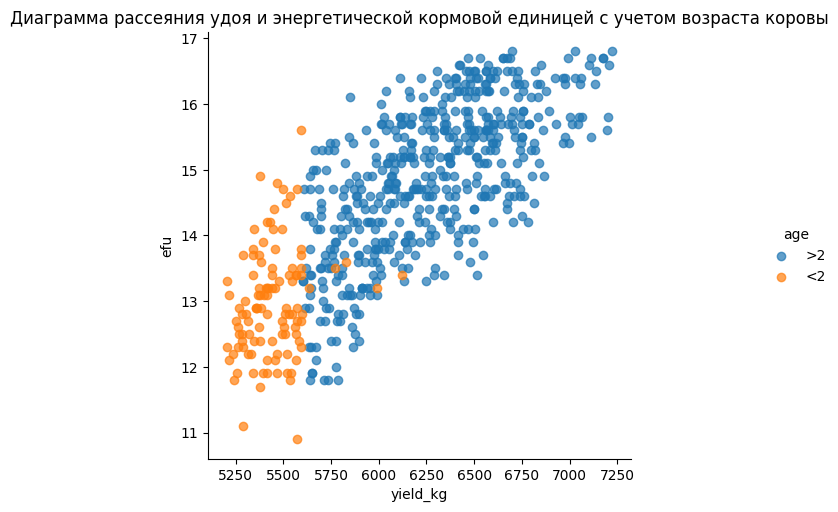

Коэффициент корреляции между удоем и энергетической кормовой единицей с учетом возраста коровы: age
<2    0.248079
>2    0.667223
Name: efu, dtype: float64


In [62]:
yield_by_age_efu = df_ferma_main.groupby('age')[['yield_kg', 'efu']].corr(method='spearman').unstack()['yield_kg']['efu']
sns.lmplot(x='yield_kg', y='efu', hue='age', data=df_ferma_main, fit_reg=False, scatter_kws={'alpha':0.7})
plt.title('Диаграмма рассеяния удоя и энергетической кормовой единицей с учетом возраста коровы')
plt.show()
print('Коэффициент корреляции между удоем и энергетической кормовой единицей с учетом возраста коровы:', yield_by_age_efu)

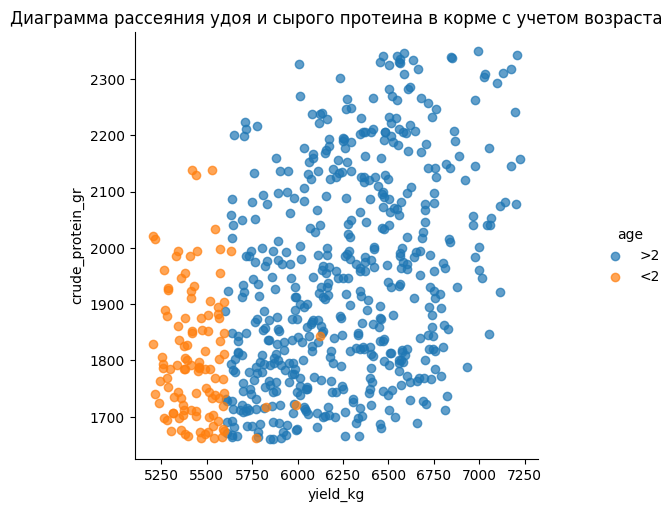

Коэффициент корреляции между удоем и сырым протеином в корме с учетом возраста: age
<2   -0.085807
>2    0.368991
Name: crude_protein_gr, dtype: float64


In [63]:
yield_by_age_crude = df_ferma_main.groupby('age')[['yield_kg', 'crude_protein_gr']].corr(method='spearman').unstack()['yield_kg']['crude_protein_gr']
sns.lmplot(x='yield_kg', y='crude_protein_gr', hue='age', data=df_ferma_main, fit_reg=False, scatter_kws={'alpha':0.7})
plt.title('Диаграмма рассеяния удоя и сырого протеина в корме с учетом возраста')
plt.show()
print('Коэффициент корреляции между удоем и сырым протеином в корме с учетом возраста:', yield_by_age_crude)

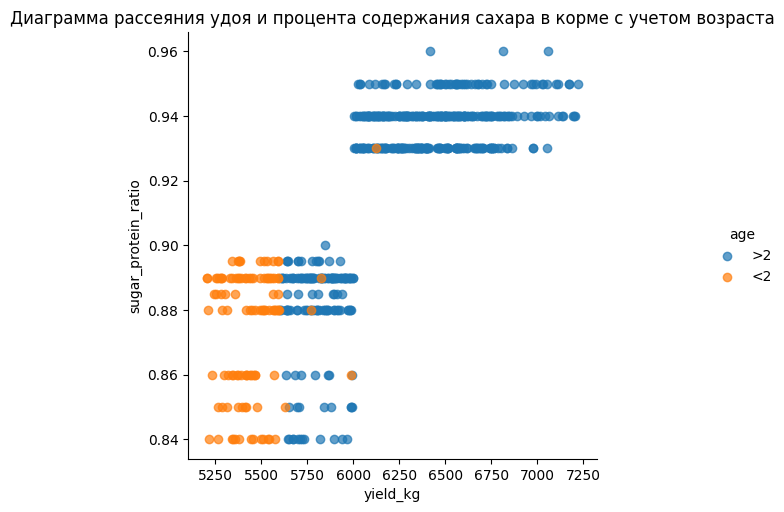

Коэффициент корреляции между удоем и процента содержания сахара в корме с учетом возраста: age
<2    0.087609
>2    0.702386
Name: sugar_protein_ratio, dtype: float64


In [64]:
yield_by_age_sugar_ratio = df_ferma_main.groupby('age')[['yield_kg', 'sugar_protein_ratio']].corr(method='spearman').unstack()['yield_kg']['sugar_protein_ratio']
sns.lmplot(x='yield_kg', y='sugar_protein_ratio', hue='age', data=df_ferma_main, fit_reg=False, scatter_kws={'alpha':0.7})
plt.title('Диаграмма рассеяния удоя и процента содержания сахара в корме с учетом возраста')
plt.show()
print('Коэффициент корреляции между удоем и процента содержания сахара в корме с учетом возраста:', yield_by_age_sugar_ratio)

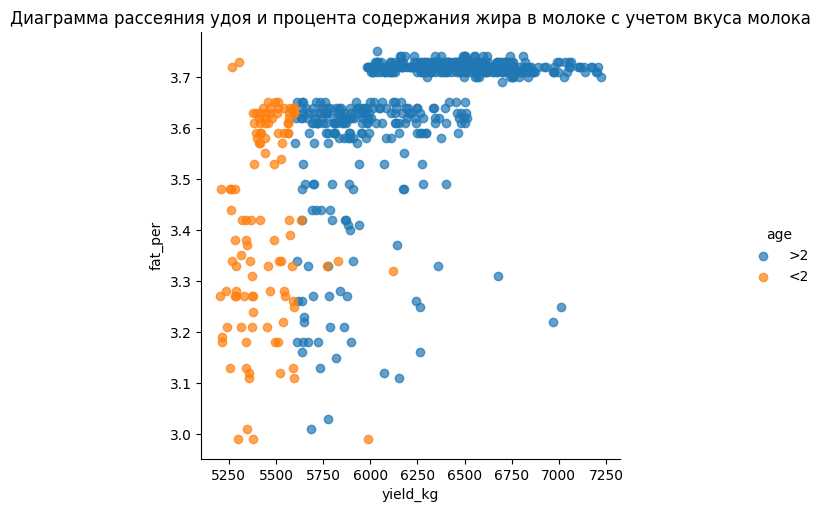

Коэффициент корреляции между удоем и процентом содержания жира в молоке с учетом вкуса молока: age
<2    0.244223
>2    0.589171
Name: fat_per, dtype: float64


In [65]:
yield_by_age_fat_per = df_ferma_main.groupby('age')[['yield_kg', 'fat_per']].corr(method='spearman').unstack()['yield_kg']['fat_per']
sns.lmplot(x='yield_kg', y='fat_per', hue='age', data=df_ferma_main, fit_reg=False, scatter_kws={'alpha':0.7})
plt.title('Диаграмма рассеяния удоя и процента содержания жира в молоке с учетом вкуса молока')
plt.show()
print('Коэффициент корреляции между удоем и процентом содержания жира в молоке с учетом вкуса молока:', yield_by_age_fat_per)

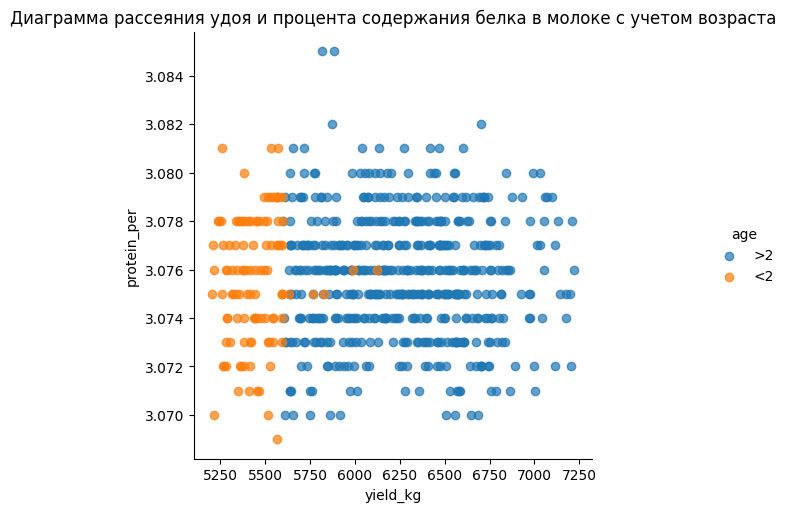

Коэффициент корреляции между удоем и содержанием белка с учетом возраста: age
<2    0.131986
>2   -0.018970
Name: protein_per, dtype: float64


In [66]:
yield_by_age_protein_per = df_ferma_main.groupby('age')[['yield_kg', 'protein_per']].corr(method='spearman').unstack()['yield_kg']['protein_per']
sns.lmplot(x='yield_kg', y='protein_per', hue='age', data=df_ferma_main, fit_reg=False, scatter_kws={'alpha':0.7})
plt.title('Диаграмма рассеяния удоя и процента содержания белка в молоке с учетом возраста')
plt.show()
print('Коэффициент корреляции между удоем и содержанием белка с учетом возраста:', yield_by_age_protein_per)

<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; Промежуточный вывод:

Ситуация с катиегорией "больше или меньше 2-х лет" меняется на 180 градусов, и коэфициенты и графики показывают, чтобы коровы старше двух лет дают больше молока
<br><br>
</div>

<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; Перед общим выводом, хочу проверить датасет на мультиколлинеарность, потому что по моему мнению, есть связь между соотношением сахара к протеину в корме и энергетической кормовой единицей. Буду рассматривать на категории больше меньше 2-х лет, потому что именно эти признаки четко делят две группы, и дают максимально точную корреляцию
<br><br>
</div>

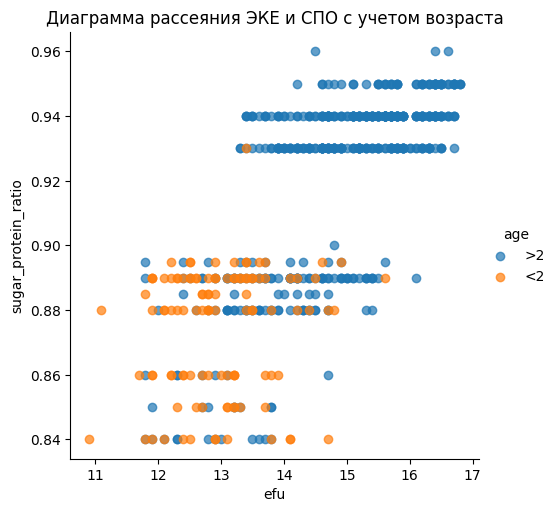

Коэффициент корреляции между ЭКЕ и СПО с учетом возраста: age
<2    0.133698
>2    0.656084
Name: sugar_protein_ratio, dtype: float64


In [67]:
efu_by_age_sugar = df_ferma_main.groupby('age')[['efu', 'sugar_protein_ratio']].corr(method='spearman').unstack()['efu']['sugar_protein_ratio']
sns.lmplot(x='efu', y='sugar_protein_ratio', hue='age', data=df_ferma_main, fit_reg=False, scatter_kws={'alpha':0.7})
plt.title('Диаграмма рассеяния ЭКЕ и СПО с учетом возраста')
plt.show()
print('Коэффициент корреляции между ЭКЕ и СПО с учетом возраста:', efu_by_age_sugar)

---
# Общий вывод по анализу колинеарности:

1. Тип взаимосвязи между целевым(удоем) и входным(ЭКЕ) признаком - нелиненйая, похожа на параболу,(-x²) во всех категориях, коэфициент корреляции сильный, около 0,8 во всех категориях, что говорит о сильной связи.
2. Тип взаимосвязи между целевым(удоем) и входным(содержанием сырого протеина) признаком - связь линейная, слабая, 0,3-0,4 с разными случаями категориальных признаков.
3. Тип взаимосвязи между целевым(удоем) и входным(соотношением сахара к протеину в корме) признаком - нелинейная, связь очень сильная для всех случаев во всех категориях
4. Тип взаимосвязи между целевым(удоем) и входным(содержание жиров в молоке в процентах) признаком - связь нелинейная, связь присутствует, не сильная 0.4 - 0.6 показывает коэфициент корреляции
5. Тип взаимосвязи между целевым(удоем) и входным(содержание белков в молоке в процентах) признаком - связь остутвует, этот входной признак можно вообще убрать, он никак не влияет на целевой признак.
6. Наблюдается мультиколлинеарность между входными признаками - СПО и ЭКЕ, коэффицент в 0,69, во всех случаях СПО показывает лучший результат, все коэффиценты говорят об этом, однако, график показывает горизонтальные линии, то есть при проценте сахара в  0,94 удой может быть как 6000литров так и 8 и больше. ЭКЕ же в свою очередь растет линейно. Так как мультиколлинеарность может повредить нашему будущему МО, можно избавиться от такого входного признака как СПО, если же МО будет плохо себя показывать, вернем СПО и избавися от ЭКЕ.
7. Нелинейные связи присутствуют между входным и целевым признаками - СПО, содержание жиров в молоке.
8. Категориальные признаки хорошо делят выборки и результат такие как: тип пастбищ, возраст и порода отца.
9. Категориальные признаки плохо делят выборки(во всех входных признках примерно одинаковое кол-во) и результат(во всех входных признках примерно одинаковое кол-во) такие как: порода самой коровы, вкусное не вкусное молоко.

----

## Обучение модели линейной регрессии

<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; Подготовим данные для обучения модели. Выберем random state в 100. Уберем такие входные признаки, как процент содержания жира в молоке, процент содержания белка в молоке и вкус молока, так как они никак не должны влиять на удой, так как это и есть само молоко, для первой модели уберем такой признак как, СПО, так как они мультиколинеаринирует с признаком ЭКЕ.
<br><br>
</div>

### Проведем анализ остатков

In [68]:
RANDOM_STATE = 100

X = df_ferma_main.drop(columns=['yield_kg', 'id', 'protein_per', 'sugar_protein_ratio', 'milk_taste','fat_per'])
y = df_ferma_main['yield_kg']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)
categorical_features = ['pasture_type', 'age', 'dad_breed', 'breed']
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
print("Коэффициент детерминации R² модели:", r2)

Коэффициент детерминации R² модели: 0.7900921828046673


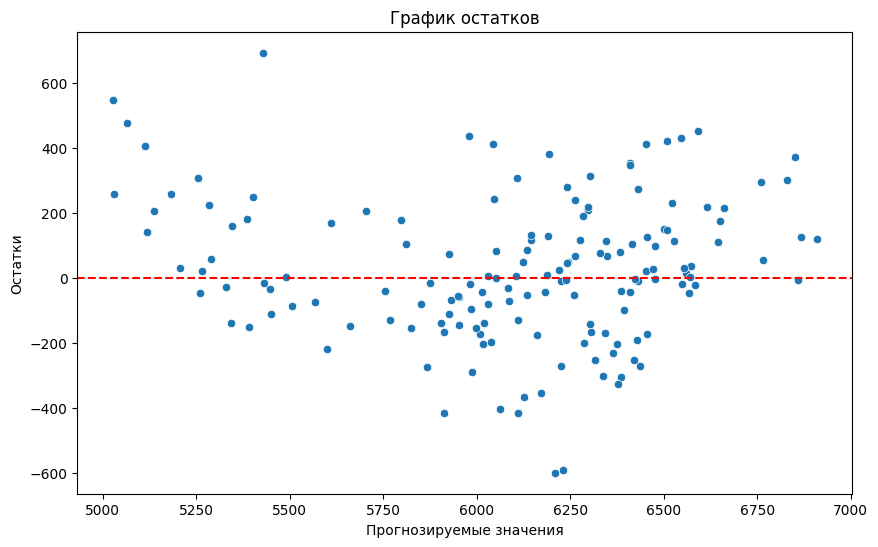

rmse : 219.89575414753563


In [69]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('График остатков')
plt.xlabel('Прогнозируемые значения')
plt.ylabel('Остатки')
plt.show()
print('rmse :', rmse)

---
### Промежуточный вывод.

<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; Знчение модели R² = 0.79 говорит о том, что наша модель линейной регрессии объясняет примерно 79,0% дисперсии в данных. Это довольно неплохой результат и указывает на то, что модель хорошо соответствует данным и способна предсказывать целевую переменную с относительно высокой точностью.

График остатков доказывает то, что наша модель при соответсвующих данных показывает себя неплохо. Среднее квадратов ошибок - 219,8 литра в год, то есть модель, ошибается в среднем на +- 219 литров. Есть конечно небольшие выбросы, где есть ошибка в -500 литров и в +750 литров.
<br><br>
</div>

----

<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; Подготовим данные с учётом связи входных признаков с целевым и обучим на них вторую модель LinearRegression.
<br><br>
</div>


In [70]:
threshold = 0.93
df_ferma_bin = df_ferma_main.copy()


df_ferma_bin['spr_bin'] = np.where(df_ferma_bin['sugar_protein_ratio'] > threshold, 1, 0)


df_ferma_bin['efu_square'] = df_ferma_bin['efu'] ** 2


df_ferma_bin.drop(['sugar_protein_ratio', 'efu'], axis=1, inplace=True)


X_1 = df_ferma_bin.drop(columns=['yield_kg', 'id', 'milk_taste', 'protein_per','fat_per'])
y_1 = df_ferma_bin['yield_kg']


X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X_1, 
    y_1, 
    random_state=RANDOM_STATE
)


categorical_features_1 = ['pasture_type', 'age', 'dad_breed', 'spr_bin','breed']
numeric_features_1 = X_1.select_dtypes(include=['int64', 'float64']).columns.tolist()


categorical_transformer_1 = OneHotEncoder(handle_unknown='ignore', drop='first')
numeric_transformer_1 = StandardScaler()


preprocessor_1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_1, numeric_features_1),
        ('cat', categorical_transformer_1, categorical_features_1)
    ])


model_1 = Pipeline(steps=[
    ('preprocessor_1', preprocessor_1),
    ('regressor_1', LinearRegression())
])
model_1.fit(X_train_1, y_train_1)


y_pred_1 = model_1.predict(X_test_1)
r2_1 = r2_score(y_test_1, y_pred_1)
print("Коэффициент детерминации R² модели:", r2_1)

Коэффициент детерминации R² модели: 0.7898431812725697


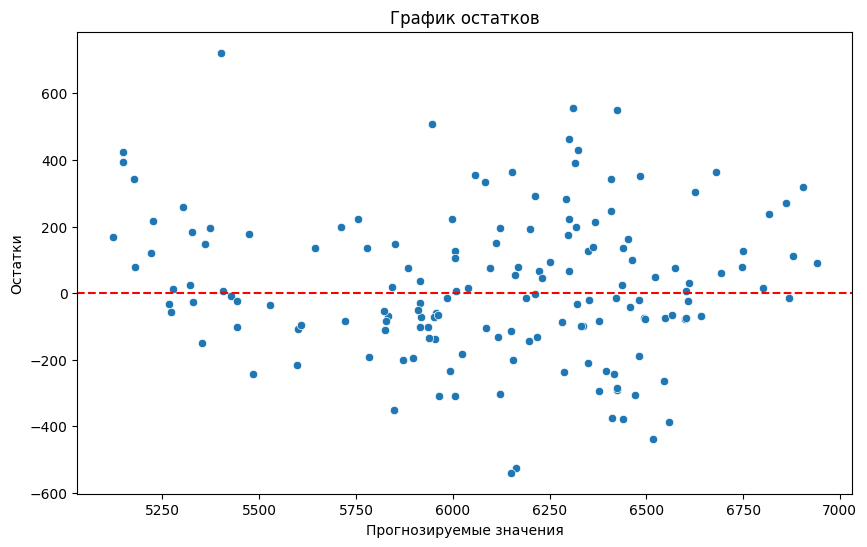

RMSE= 220.02614031430517


In [71]:
residuals_1 = y_test_1 - y_pred_1
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_1, y=residuals_1)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('График остатков')
plt.xlabel('Прогнозируемые значения')
plt.ylabel('Остатки')
plt.show()
rmse_1 = np.sqrt(mean_squared_error(y_test_1, y_pred_1))
print('RMSE=', rmse_1)

---
### Промежуточный вывод.

<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; Знчение модели R² = 0.789, значение ухудшилось, наша модель линейной регрессии объясняет примерно 78.9% дисперсии в данных. 
График остатков доказывает то, что наша модель при соответсвующих данных показывает себя хуже. Среднее квадратов ошибок стало 220,2 литра в год, выбросы ошибок в -500, и в 750 остались на месте
<br><br>
</div>

----

<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; Добавим в данные новый признак и обучим третью модель
<br><br>
</div>

In [72]:
df_name_new = pd.merge(df_ferma_bin, df_ferma_dad, on="id", how="left")
df_name_new['dad_name'] = df_ferma_dad['dad_name']

In [73]:
display(df_name_new)

id  yield_kg  crude_protein_gr                breed pasture_type  \
0      1      5863              1743       vis_back_ideal         flat   
1      2      5529              2138       vis_back_ideal         flat   
2      3      5810              1854  reflection_sovering        hilly   
3      4      5895              2012  reflection_sovering        hilly   
4      5      5302              1675       vis_back_ideal         flat   
..   ...       ...               ...                  ...          ...   
623  625      6812              1964  reflection_sovering         flat   
624  626      5513              1700  reflection_sovering         flat   
625  627      5970              1837  reflection_sovering        hilly   
626  628      5746              1994  reflection_sovering         flat   
627  629      6503              2283       vis_back_ideal        hilly   

     dad_breed  fat_per  protein_per milk_taste age  spr_bin  efu_square  \
0        ideal     3.58        3.076      tasty  >2        0      201.64   
1    sovereign     3.54        3.079      tasty  <2        0      163.84   
2    sovereign     3.59        3.074  not_tasty  >2        0      196.00   
3        ideal     3.40        3.075  not_tasty  >2        0      153.76   
4    sovereign     3.73        3.073      tasty  <2        0      163.84   
..         ...      ...          ...        ...  ..      ...         ...   
623      ideal     3.74        3.075  not_tasty  >2        1      237.16   
624  sovereign     3.64        3.073      tasty  <2        0      166.41   
625  sovereign     3.64        3.075  not_tasty  >2        0      207.36   
626  sovereign     3.64        3.077      tasty  >2        0      190.44   
627  sovereign     3.71        3.076      tasty  >2        1      262.44   

      dad_name  
0       buynyi  
1    solovchik  
2        barin  
3       buynyi  
4        barin  
..         ...  
623      barin  
624     buynyi  
625      barin  
626      barin  
627      barin  

[628 rows x 13 columns]

In [74]:
X_2 = df_name_new.drop(columns=['yield_kg', 'id', 'protein_per', 'milk_taste','fat_per'])
y_2 = df_name_new['yield_kg']

categorical_features_2 = ['pasture_type', 'age', 'dad_breed','dad_name', 'breed','spr_bin']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_2, 
    y_2, 
    random_state=RANDOM_STATE
)



categorical_transformer_2 = OneHotEncoder(handle_unknown='ignore', drop='first')
numeric_features_2 = X_2.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_transformer_2 = StandardScaler()
preprocessor_2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_2, numeric_features_2),
        ('cat', categorical_transformer_2, categorical_features_2)])



model_2 = Pipeline(steps=[('preprocessor_2', preprocessor_2),
                          ('regressor_2', LinearRegression())])
model_2.fit(X_train_2, y_train_2)


y_pred_2 = model_2.predict(X_test_2)


r2_2 = r2_score(y_test_2, y_pred_2)
print("Коэффициент детерминации R² модели:", r2_2)

Коэффициент детерминации R² модели: 0.7904583519973987


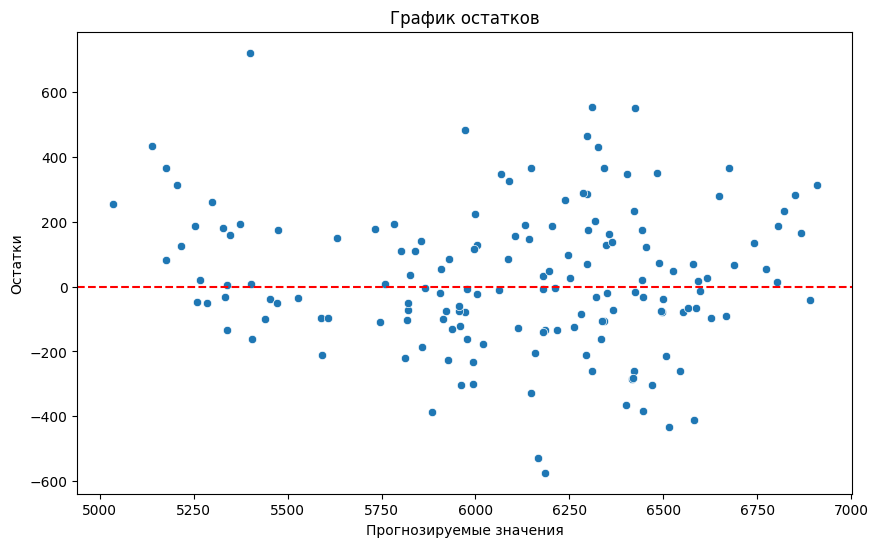

RMSE= 219.70387421316292


In [75]:
residuals_2 = y_test_2 - y_pred_2
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_2, y=residuals_2)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('График остатков')
plt.xlabel('Прогнозируемые значения')
plt.ylabel('Остатки')
plt.show()
rmse_2 = np.sqrt(mean_squared_error(y_test_2, y_pred_2))
print('RMSE=', rmse_2)

---
### Промежуточный вывод.

<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; Самое лучшее значение R² у трех моделей - третье, где мы преобразовали СПО в бинарный сет и добавили имя отца, среднее корня квадратов ошибок тоже показывает самый лучший результат у третьей модели, осталось проверить MAE и MSE у всех трех моделей
<br><br>
</div>

----

In [76]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

mae_1 = mean_absolute_error(y_test_1, y_pred_1)
mse_1 = mean_squared_error(y_test_1, y_pred_1)

mae_2 = mean_absolute_error(y_test_2, y_pred_2)
mse_2 = mean_squared_error(y_test_2, y_pred_2)
print("MAE для первой модели:", mae)
print("MSE для первой модели:", mse)

print("MAE для второй модели:", mae_1)
print("MSE для второй модели:", mse_1)

print("MAE для третьей модели:", mae_2)
print("MSE для третьей модели:", mse_2)

MAE для первой модели: 169.1902881459215
MSE для первой модели: 48354.14269211343
MAE для второй модели: 170.3922015575567
MSE для второй модели: 48411.502421610305
MAE для третьей модели: 170.25552517194816
MSE для третьей модели: 48269.79234427331


<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; МАЕ показывает, что лучший результат у первой модели, однако среднее корня квадратов ошибок и среднее квадратов ошибок, говорит о том, что лучшачя модель - третья, 2/3, выбираем третью модель. Посмотрим на доверительный интервал лучшей модели
<br><br>
</div>

In [77]:
errors = y_test_2 - y_pred_2

lower_quantile = np.percentile(errors, 2.5)
upper_quantile = np.percentile(errors, 97.5)
print('95% доверительный интервал модели =', st.norm.interval(alpha=0.95, loc=np.mean(y_pred_2), scale=st.sem(y_pred_2)))
print("95% доверительный интервал для ошибок:", (lower_quantile, upper_quantile))

95% доверительный интервал модели = (6024.183165702759, 6163.260854425934)
95% доверительный интервал для ошибок: (-389.5481408147478, 467.85756882903405)


---
### Промежуточный вывод.

<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; Третья модель на всех метриках показывает лучший результат, перейдем к новому датасету и прогоним нашу регрессию.
с 95% вероятностью истинное значение прогноза лучшей модели на тестовых данных будет лежать в интервале от приблизительно 6024 до 6163. А доверительный интервал ошибок говорит, что с вероятностью 95% ошибка прогноза будет находиться в пределах от -389.5 до 467.8. То есть, прогнозы, сделанные нашей моделью, могут быть ошибочными на величину, попадающую в этот диапазон.
<br><br>
</div>

----

In [78]:
display(df_cow_buy)

breed pasture_type  dad_breed   dad_name  fat_per  \
0        vis_back_ideal        hilly      ideal   hercules     3.58   
1        vis_back_ideal         flat  sovereign     buynyi     3.54   
2   reflection_sovering         flat  sovereign      barin     3.59   
3   reflection_sovering        hilly      ideal     buynyi     3.40   
4   reflection_sovering         flat      ideal     buynyi     3.64   
5   reflection_sovering         flat  sovereign   hercules     3.63   
7        vis_back_ideal         flat  sovereign     buynyi     3.57   
9   reflection_sovering        hilly      ideal     buynyi     3.40   
10       vis_back_ideal        hilly  sovereign  solovchik     3.73   
11  reflection_sovering         flat  sovereign   hercules     3.73   
12       vis_back_ideal        hilly      ideal   hercules     3.68   
13       vis_back_ideal        hilly  sovereign      barin     3.42   
15  reflection_sovering        hilly      ideal     buynyi     3.40   
16       vis_back_ideal        hilly  sovereign  solovchik     3.73   
17  reflection_sovering         flat  sovereign   hercules     3.77   
18       vis_back_ideal         flat  sovereign     buynyi     3.34   

    protein_per age  
0         3.076  >2  
1         3.081  <2  
2         3.074  >2  
3         3.061  >2  
4         3.074  >2  
5         3.053  <2  
7         3.079  >2  
9         3.079  <2  
10        3.055  >2  
11        3.073  >2  
12        3.046  >2  
13        3.075  <2  
15        3.065  >2  
16        3.079  >2  
17        3.053  <2  
18        3.069  >2

In [79]:
df_name_test_new = df_name_new.copy()
df_cow_buy_test_new = df_cow_buy.copy()

mean_efu = df_name_test_new['efu_square'].mean() * 1.05
mean_crude_protein = df_name_test_new['crude_protein_gr'].mean() * 1.05
mean_spr_bin = df_name_test_new['spr_bin'].median() * 1.05

df_cow_buy_test_new['efu_square'] = mean_efu
df_cow_buy_test_new['crude_protein_gr'] = mean_crude_protein
df_cow_buy_test_new['spr_bin'] = mean_spr_bin


df_cow_buy_test_new.drop(columns=['fat_per'], inplace=True)
df_cow_buy_test_new.drop(columns=['protein_per'], inplace=True)
display(df_name_test_new)
display(df_cow_buy_test_new)

id  yield_kg  crude_protein_gr                breed pasture_type  \
0      1      5863              1743       vis_back_ideal         flat   
1      2      5529              2138       vis_back_ideal         flat   
2      3      5810              1854  reflection_sovering        hilly   
3      4      5895              2012  reflection_sovering        hilly   
4      5      5302              1675       vis_back_ideal         flat   
..   ...       ...               ...                  ...          ...   
623  625      6812              1964  reflection_sovering         flat   
624  626      5513              1700  reflection_sovering         flat   
625  627      5970              1837  reflection_sovering        hilly   
626  628      5746              1994  reflection_sovering         flat   
627  629      6503              2283       vis_back_ideal        hilly   

     dad_breed  fat_per  protein_per milk_taste age  spr_bin  efu_square  \
0        ideal     3.58        3.076      tasty  >2        0      201.64   
1    sovereign     3.54        3.079      tasty  <2        0      163.84   
2    sovereign     3.59        3.074  not_tasty  >2        0      196.00   
3        ideal     3.40        3.075  not_tasty  >2        0      153.76   
4    sovereign     3.73        3.073      tasty  <2        0      163.84   
..         ...      ...          ...        ...  ..      ...         ...   
623      ideal     3.74        3.075  not_tasty  >2        1      237.16   
624  sovereign     3.64        3.073      tasty  <2        0      166.41   
625  sovereign     3.64        3.075  not_tasty  >2        0      207.36   
626  sovereign     3.64        3.077      tasty  >2        0      190.44   
627  sovereign     3.71        3.076      tasty  >2        1      262.44   

      dad_name  
0       buynyi  
1    solovchik  
2        barin  
3       buynyi  
4        barin  
..         ...  
623      barin  
624     buynyi  
625      barin  
626      barin  
627      barin  

[628 rows x 13 columns]

breed pasture_type  dad_breed   dad_name age  efu_square  \
0        vis_back_ideal        hilly      ideal   hercules  >2  224.025225   
1        vis_back_ideal         flat  sovereign     buynyi  <2  224.025225   
2   reflection_sovering         flat  sovereign      barin  >2  224.025225   
3   reflection_sovering        hilly      ideal     buynyi  >2  224.025225   
4   reflection_sovering         flat      ideal     buynyi  >2  224.025225   
5   reflection_sovering         flat  sovereign   hercules  <2  224.025225   
7        vis_back_ideal         flat  sovereign     buynyi  >2  224.025225   
9   reflection_sovering        hilly      ideal     buynyi  <2  224.025225   
10       vis_back_ideal        hilly  sovereign  solovchik  >2  224.025225   
11  reflection_sovering         flat  sovereign   hercules  >2  224.025225   
12       vis_back_ideal        hilly      ideal   hercules  >2  224.025225   
13       vis_back_ideal        hilly  sovereign      barin  <2  224.025225   
15  reflection_sovering        hilly      ideal     buynyi  >2  224.025225   
16       vis_back_ideal        hilly  sovereign  solovchik  >2  224.025225   
17  reflection_sovering         flat  sovereign   hercules  <2  224.025225   
18       vis_back_ideal         flat  sovereign     buynyi  >2  224.025225   

    crude_protein_gr  spr_bin  
0        2019.947532      0.0  
1        2019.947532      0.0  
2        2019.947532      0.0  
3        2019.947532      0.0  
4        2019.947532      0.0  
5        2019.947532      0.0  
7        2019.947532      0.0  
9        2019.947532      0.0  
10       2019.947532      0.0  
11       2019.947532      0.0  
12       2019.947532      0.0  
13       2019.947532      0.0  
15       2019.947532      0.0  
16       2019.947532      0.0  
17       2019.947532      0.0  
18       2019.947532      0.0

In [80]:
new_columns_order_new = ['crude_protein_gr','breed', 'pasture_type', 'dad_breed', 'age', 'spr_bin', 'efu_square','dad_name']

df_cow_buy_test_new = df_cow_buy_test_new[new_columns_order_new]

display(df_cow_buy_test_new)

crude_protein_gr                breed pasture_type  dad_breed age  \
0        2019.947532       vis_back_ideal        hilly      ideal  >2   
1        2019.947532       vis_back_ideal         flat  sovereign  <2   
2        2019.947532  reflection_sovering         flat  sovereign  >2   
3        2019.947532  reflection_sovering        hilly      ideal  >2   
4        2019.947532  reflection_sovering         flat      ideal  >2   
5        2019.947532  reflection_sovering         flat  sovereign  <2   
7        2019.947532       vis_back_ideal         flat  sovereign  >2   
9        2019.947532  reflection_sovering        hilly      ideal  <2   
10       2019.947532       vis_back_ideal        hilly  sovereign  >2   
11       2019.947532  reflection_sovering         flat  sovereign  >2   
12       2019.947532       vis_back_ideal        hilly      ideal  >2   
13       2019.947532       vis_back_ideal        hilly  sovereign  <2   
15       2019.947532  reflection_sovering        hilly      ideal  >2   
16       2019.947532       vis_back_ideal        hilly  sovereign  >2   
17       2019.947532  reflection_sovering         flat  sovereign  <2   
18       2019.947532       vis_back_ideal         flat  sovereign  >2   

    spr_bin  efu_square   dad_name  
0       0.0  224.025225   hercules  
1       0.0  224.025225     buynyi  
2       0.0  224.025225      barin  
3       0.0  224.025225     buynyi  
4       0.0  224.025225     buynyi  
5       0.0  224.025225   hercules  
7       0.0  224.025225     buynyi  
9       0.0  224.025225     buynyi  
10      0.0  224.025225  solovchik  
11      0.0  224.025225   hercules  
12      0.0  224.025225   hercules  
13      0.0  224.025225      barin  
15      0.0  224.025225     buynyi  
16      0.0  224.025225  solovchik  
17      0.0  224.025225   hercules  
18      0.0  224.025225     buynyi

In [81]:
predicted_yield_array = model_2.predict(df_cow_buy_test_new)


display(predicted_yield_array)

array([6258.48619958, 5721.45113927, 6013.14191833, 6366.64288598,
       6315.24012986, 5620.1598484 , 6040.64800951, 6047.44601574,
       6067.35013058, 5939.35671864, 6258.48619958, 5741.91510644,
       6366.64288598, 6067.35013058, 5620.1598484 , 6040.64800951])

In [82]:
df_cow_buy_test_new['predicted'] = predicted_yield_array
sorted_dataset = df_cow_buy_test_new.sort_values(by='predicted', ascending=False)
display(sorted_dataset)

crude_protein_gr                breed pasture_type  dad_breed age  \
3        2019.947532  reflection_sovering        hilly      ideal  >2   
15       2019.947532  reflection_sovering        hilly      ideal  >2   
4        2019.947532  reflection_sovering         flat      ideal  >2   
0        2019.947532       vis_back_ideal        hilly      ideal  >2   
12       2019.947532       vis_back_ideal        hilly      ideal  >2   
10       2019.947532       vis_back_ideal        hilly  sovereign  >2   
16       2019.947532       vis_back_ideal        hilly  sovereign  >2   
9        2019.947532  reflection_sovering        hilly      ideal  <2   
7        2019.947532       vis_back_ideal         flat  sovereign  >2   
18       2019.947532       vis_back_ideal         flat  sovereign  >2   
2        2019.947532  reflection_sovering         flat  sovereign  >2   
11       2019.947532  reflection_sovering         flat  sovereign  >2   
13       2019.947532       vis_back_ideal        hilly  sovereign  <2   
1        2019.947532       vis_back_ideal         flat  sovereign  <2   
5        2019.947532  reflection_sovering         flat  sovereign  <2   
17       2019.947532  reflection_sovering         flat  sovereign  <2   

    spr_bin  efu_square   dad_name    predicted  
3       0.0  224.025225     buynyi  6366.642886  
15      0.0  224.025225     buynyi  6366.642886  
4       0.0  224.025225     buynyi  6315.240130  
0       0.0  224.025225   hercules  6258.486200  
12      0.0  224.025225   hercules  6258.486200  
10      0.0  224.025225  solovchik  6067.350131  
16      0.0  224.025225  solovchik  6067.350131  
9       0.0  224.025225     buynyi  6047.446016  
7       0.0  224.025225     buynyi  6040.648010  
18      0.0  224.025225     buynyi  6040.648010  
2       0.0  224.025225      barin  6013.141918  
11      0.0  224.025225   hercules  5939.356719  
13      0.0  224.025225      barin  5741.915106  
1       0.0  224.025225     buynyi  5721.451139  
5       0.0  224.025225   hercules  5620.159848  
17      0.0  224.025225   hercules  5620.159848

---

# Общий вывод: 
<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; Мы создали 3 модели линейной регрессии, лучше всех себя показала третья модель, у которой СПО является категориальным бинарным признаком, ЭКЕ возведена в квадрат, и и сеть новый признак "имя отца", эта модель объясняет 79,04% дисперсии в данных.
<br><br>
</div>

### Рекомендация фермеру: 
<div style="background-color: rgba(200, 200, 235, 0.3);">
<br>
Нужно покупать корову №4 и №16 с породой соверин, которая паслась на холмистых пастбищах, отец был породы айдиал, и ей больше 2-х лет, а их отца зовут Буйный. Если захотите купить сразу несколько коров, то вот топ-5 после №4 и №16:    
<br><br>
</div>

#### 1. №5 - порода рефлекшн соверин	, тип пастбища	- равнинный,	порода отца - айдиал, имя отца - Буйный

#### 2. №1 - порода - вис бэк,	 тип пастбища	- холмистый, 	порода отца - айдиал,  имя отца - Геркулес	

#### 3. №13 -  порода  вис бэк,	 тип пастбища	- холмистый,	порода отца - айдиал,  имя отца - Геркулес

#### 4. №11 -  порода  вис бэк,	 тип пастбища	- холмистый,	порода отца - соверин,  имя отца - Соловчик

#### 5. №17 - порода вис бэк,	 тип пастбища	- холмистый,	порода отца - соверин,  имя отца - Соловчик

----


## Обучение модели логистической регрессии

---

### Обучим новую модель, где целевой признак будет вкус молока

#### А также надо перепровить датасеты, т.к я добавлял столбцы в основные датасеты

---

In [83]:
display(df_ferma_main)
display(df_cow_buy)

id  yield_kg   efu  crude_protein_gr  sugar_protein_ratio  \
0      1      5863  14.2              1743                0.890   
1      2      5529  12.8              2138                0.890   
2      3      5810  14.0              1854                0.885   
3      4      5895  12.4              2012                0.885   
4      5      5302  12.8              1675                0.885   
..   ...       ...   ...               ...                  ...   
624  625      6812  15.4              1964                0.940   
625  626      5513  12.9              1700                0.880   
626  627      5970  14.4              1837                0.880   
627  628      5746  13.8              1994                0.890   
628  629      6503  16.2              2283                0.940   

                   breed pasture_type  dad_breed  fat_per  protein_per  \
0         vis_back_ideal         flat      ideal     3.58        3.076   
1         vis_back_ideal         flat  sovereign     3.54        3.079   
2    reflection_sovering        hilly  sovereign     3.59        3.074   
3    reflection_sovering        hilly      ideal     3.40        3.075   
4         vis_back_ideal         flat  sovereign     3.73        3.073   
..                   ...          ...        ...      ...          ...   
624  reflection_sovering         flat      ideal     3.74        3.075   
625  reflection_sovering         flat  sovereign     3.64        3.073   
626  reflection_sovering        hilly  sovereign     3.64        3.075   
627  reflection_sovering         flat  sovereign     3.64        3.077   
628       vis_back_ideal        hilly  sovereign     3.71        3.076   

    milk_taste age  
0        tasty  >2  
1        tasty  <2  
2    not_tasty  >2  
3    not_tasty  >2  
4        tasty  <2  
..         ...  ..  
624  not_tasty  >2  
625      tasty  <2  
626  not_tasty  >2  
627      tasty  >2  
628      tasty  >2  

[628 rows x 12 columns]

breed pasture_type  dad_breed   dad_name  fat_per  \
0        vis_back_ideal        hilly      ideal   hercules     3.58   
1        vis_back_ideal         flat  sovereign     buynyi     3.54   
2   reflection_sovering         flat  sovereign      barin     3.59   
3   reflection_sovering        hilly      ideal     buynyi     3.40   
4   reflection_sovering         flat      ideal     buynyi     3.64   
5   reflection_sovering         flat  sovereign   hercules     3.63   
7        vis_back_ideal         flat  sovereign     buynyi     3.57   
9   reflection_sovering        hilly      ideal     buynyi     3.40   
10       vis_back_ideal        hilly  sovereign  solovchik     3.73   
11  reflection_sovering         flat  sovereign   hercules     3.73   
12       vis_back_ideal        hilly      ideal   hercules     3.68   
13       vis_back_ideal        hilly  sovereign      barin     3.42   
15  reflection_sovering        hilly      ideal     buynyi     3.40   
16       vis_back_ideal        hilly  sovereign  solovchik     3.73   
17  reflection_sovering         flat  sovereign   hercules     3.77   
18       vis_back_ideal         flat  sovereign     buynyi     3.34   

    protein_per age  
0         3.076  >2  
1         3.081  <2  
2         3.074  >2  
3         3.061  >2  
4         3.074  >2  
5         3.053  <2  
7         3.079  >2  
9         3.079  <2  
10        3.055  >2  
11        3.073  >2  
12        3.046  >2  
13        3.075  <2  
15        3.065  >2  
16        3.079  >2  
17        3.053  <2  
18        3.069  >2

<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; Перед подготовкой модели, сравняем наши входные признаки
<br><br>
</div>


In [84]:
df_main_cat = pd.merge(df_ferma_main, df_ferma_dad, on="id", how="left")
df_main_cat['dad_name'] = df_ferma_dad['dad_name']
df_cow_cat = df_cow_buy.copy()

In [85]:
df_main_cat.drop(columns=['yield_kg'], inplace=True)
df_main_cat.drop(columns=['efu'], inplace=True)
df_main_cat.drop(columns=['crude_protein_gr'], inplace=True)
df_main_cat.drop(columns=['sugar_protein_ratio'], inplace=True)

display(df_main_cat)
display(df_cow_cat)

id                breed pasture_type  dad_breed  fat_per  protein_per  \
0      1       vis_back_ideal         flat      ideal     3.58        3.076   
1      2       vis_back_ideal         flat  sovereign     3.54        3.079   
2      3  reflection_sovering        hilly  sovereign     3.59        3.074   
3      4  reflection_sovering        hilly      ideal     3.40        3.075   
4      5       vis_back_ideal         flat  sovereign     3.73        3.073   
..   ...                  ...          ...        ...      ...          ...   
623  625  reflection_sovering         flat      ideal     3.74        3.075   
624  626  reflection_sovering         flat  sovereign     3.64        3.073   
625  627  reflection_sovering        hilly  sovereign     3.64        3.075   
626  628  reflection_sovering         flat  sovereign     3.64        3.077   
627  629       vis_back_ideal        hilly  sovereign     3.71        3.076   

    milk_taste age   dad_name  
0        tasty  >2     buynyi  
1        tasty  <2  solovchik  
2    not_tasty  >2      barin  
3    not_tasty  >2     buynyi  
4        tasty  <2      barin  
..         ...  ..        ...  
623  not_tasty  >2      barin  
624      tasty  <2     buynyi  
625  not_tasty  >2      barin  
626      tasty  >2      barin  
627      tasty  >2      barin  

[628 rows x 9 columns]

breed pasture_type  dad_breed   dad_name  fat_per  \
0        vis_back_ideal        hilly      ideal   hercules     3.58   
1        vis_back_ideal         flat  sovereign     buynyi     3.54   
2   reflection_sovering         flat  sovereign      barin     3.59   
3   reflection_sovering        hilly      ideal     buynyi     3.40   
4   reflection_sovering         flat      ideal     buynyi     3.64   
5   reflection_sovering         flat  sovereign   hercules     3.63   
7        vis_back_ideal         flat  sovereign     buynyi     3.57   
9   reflection_sovering        hilly      ideal     buynyi     3.40   
10       vis_back_ideal        hilly  sovereign  solovchik     3.73   
11  reflection_sovering         flat  sovereign   hercules     3.73   
12       vis_back_ideal        hilly      ideal   hercules     3.68   
13       vis_back_ideal        hilly  sovereign      barin     3.42   
15  reflection_sovering        hilly      ideal     buynyi     3.40   
16       vis_back_ideal        hilly  sovereign  solovchik     3.73   
17  reflection_sovering         flat  sovereign   hercules     3.77   
18       vis_back_ideal         flat  sovereign     buynyi     3.34   

    protein_per age  
0         3.076  >2  
1         3.081  <2  
2         3.074  >2  
3         3.061  >2  
4         3.074  >2  
5         3.053  <2  
7         3.079  >2  
9         3.079  <2  
10        3.055  >2  
11        3.073  >2  
12        3.046  >2  
13        3.075  <2  
15        3.065  >2  
16        3.079  >2  
17        3.053  <2  
18        3.069  >2

In [86]:
columns_cat = ['breed', 'pasture_type', 'dad_breed', 'fat_per', 'protein_per', 'age', 'dad_name']

df_cow_cat = df_cow_cat[columns_cat]

display(df_cow_cat)

breed pasture_type  dad_breed  fat_per  protein_per age  \
0        vis_back_ideal        hilly      ideal     3.58        3.076  >2   
1        vis_back_ideal         flat  sovereign     3.54        3.081  <2   
2   reflection_sovering         flat  sovereign     3.59        3.074  >2   
3   reflection_sovering        hilly      ideal     3.40        3.061  >2   
4   reflection_sovering         flat      ideal     3.64        3.074  >2   
5   reflection_sovering         flat  sovereign     3.63        3.053  <2   
7        vis_back_ideal         flat  sovereign     3.57        3.079  >2   
9   reflection_sovering        hilly      ideal     3.40        3.079  <2   
10       vis_back_ideal        hilly  sovereign     3.73        3.055  >2   
11  reflection_sovering         flat  sovereign     3.73        3.073  >2   
12       vis_back_ideal        hilly      ideal     3.68        3.046  >2   
13       vis_back_ideal        hilly  sovereign     3.42        3.075  <2   
15  reflection_sovering        hilly      ideal     3.40        3.065  >2   
16       vis_back_ideal        hilly  sovereign     3.73        3.079  >2   
17  reflection_sovering         flat  sovereign     3.77        3.053  <2   
18       vis_back_ideal         flat  sovereign     3.34        3.069  >2   

     dad_name  
0    hercules  
1      buynyi  
2       barin  
3      buynyi  
4      buynyi  
5    hercules  
7      buynyi  
9      buynyi  
10  solovchik  
11   hercules  
12   hercules  
13      barin  
15     buynyi  
16  solovchik  
17   hercules  
18     buynyi

In [87]:
df_main_cat['milk_taste'] = df_main_cat['milk_taste'].apply(lambda x: 1 if x == 'tasty' else 0)
df_main_cat['milk_taste'] = df_main_cat['milk_taste'].astype(int)
df_main_cat['milk_taste'] = df_main_cat['milk_taste'].astype(float)
display(df_main_cat)

id                breed pasture_type  dad_breed  fat_per  protein_per  \
0      1       vis_back_ideal         flat      ideal     3.58        3.076   
1      2       vis_back_ideal         flat  sovereign     3.54        3.079   
2      3  reflection_sovering        hilly  sovereign     3.59        3.074   
3      4  reflection_sovering        hilly      ideal     3.40        3.075   
4      5       vis_back_ideal         flat  sovereign     3.73        3.073   
..   ...                  ...          ...        ...      ...          ...   
623  625  reflection_sovering         flat      ideal     3.74        3.075   
624  626  reflection_sovering         flat  sovereign     3.64        3.073   
625  627  reflection_sovering        hilly  sovereign     3.64        3.075   
626  628  reflection_sovering         flat  sovereign     3.64        3.077   
627  629       vis_back_ideal        hilly  sovereign     3.71        3.076   

     milk_taste age   dad_name  
0           1.0  >2     buynyi  
1           1.0  <2  solovchik  
2           0.0  >2      barin  
3           0.0  >2     buynyi  
4           1.0  <2      barin  
..          ...  ..        ...  
623         0.0  >2      barin  
624         1.0  <2     buynyi  
625         0.0  >2      barin  
626         1.0  >2      barin  
627         1.0  >2      barin  

[628 rows x 9 columns]

In [88]:
X_log = df_main_cat.drop(columns = ['id', 'milk_taste'])
y_log = df_main_cat['milk_taste']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log, 
    y_log, 
    random_state=RANDOM_STATE)

cat_col_names_log = ['breed', 'pasture_type', 'dad_breed', 'dad_name', 'age']
num_col_names_log = ['fat_per', 'protein_per']

encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_train_ohe_log = encoder.fit_transform(X_train_log[cat_col_names_log])
X_test_ohe_log = encoder.transform(X_test_log[cat_col_names_log])

encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled_log = scaler.fit_transform(X_train_log[num_col_names_log])
X_test_scaled_log = scaler.transform(X_test_log[num_col_names_log])

X_train_ohe_log = pd.DataFrame(X_train_ohe_log, columns=encoder_col_names)
X_test_ohe_log = pd.DataFrame(X_test_ohe_log, columns=encoder_col_names)

X_train_scaled_log = pd.DataFrame(X_train_scaled_log, columns=num_col_names_log)
X_test_scaled_log = pd.DataFrame(X_test_scaled_log, columns=num_col_names_log)

X_train_log = pd.concat([X_train_ohe_log, X_train_scaled_log], axis=1)
X_test_log = pd.concat([X_test_ohe_log, X_test_scaled_log], axis=1)

display(X_train_log)
display(y_train_log)

breed_vis_back_ideal  pasture_type_hilly  dad_breed_sovereign  \
0                     0.0                 0.0                  0.0   
1                     1.0                 0.0                  1.0   
2                     1.0                 0.0                  0.0   
3                     1.0                 0.0                  0.0   
4                     0.0                 1.0                  0.0   
..                    ...                 ...                  ...   
466                   1.0                 1.0                  1.0   
467                   0.0                 1.0                  0.0   
468                   1.0                 0.0                  0.0   
469                   1.0                 0.0                  0.0   
470                   0.0                 1.0                  1.0   

     dad_name_buynyi  dad_name_hercules  dad_name_solovchik  age_>2   fat_per  \
0                0.0                0.0                 0.0     1.0  0.079479   
1                0.0                0.0                 0.0     1.0  0.689164   
2                0.0                1.0                 0.0     1.0  0.750133   
3                1.0                0.0                 0.0     1.0  0.811102   
4                0.0                0.0                 0.0     1.0  0.628196   
..               ...                ...                 ...     ...       ...   
466              0.0                0.0                 0.0     0.0  0.201416   
467              0.0                0.0                 0.0     0.0 -0.469238   
468              1.0                0.0                 0.0     1.0  0.750133   
469              0.0                1.0                 0.0     1.0 -0.774080   
470              0.0                0.0                 1.0     0.0  0.689164   

     protein_per  
0      -1.447184  
1      -0.660544  
2       0.519416  
3       0.126096  
4      -0.267224  
..           ...  
466     0.126096  
467     1.699376  
468    -0.660544  
469    -1.053864  
470     0.519416  

[471 rows x 9 columns]

491    1.0
329    1.0
565    1.0
27     1.0
598    1.0
      ... 
578    1.0
53     0.0
350    0.0
79     0.0
520    0.0
Name: milk_taste, Length: 471, dtype: float64

In [89]:
clf = LogisticRegression()
clf.fit(X_train_log, y_train_log)
y_pred_log = clf.predict(X_test_log)

acc = accuracy_score(y_test_log, y_pred_log)
recall = recall_score(y_pred_log,y_test_log)
precision = precision_score(y_pred_log,y_test_log)


print('accuracy: ', acc)
print('recall: ',recall)
print('precision: ',precision)

accuracy:  0.5668789808917197
recall:  0.5897435897435898
precision:  0.7752808988764045


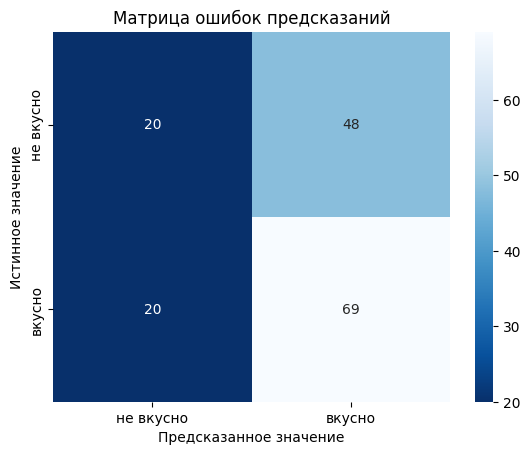

In [90]:
matrix = confusion_matrix(y_test_log, y_pred_log)
cm_df = pd.DataFrame(matrix, index=['не вкусно', 'вкусно'], columns=['не вкусно', 'вкусно'])

sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок предсказаний')
plt.ylabel('Истинное значение')
plt.xlabel('Предсказанное значение')
plt.show()

<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; Матрица показывает, что наша модель в 20 случаях угадвает, что молоко на самом деле будет не вкусным, в 48 случаях предсказывает, что будет вкусно, когда на самом деле не вкусно, в 20 случаях, говорит, что молоко не вкусное, в то время, когда оно вкусное, и в 69 случаях угадывает, что будет вкусно.

Так как для фермера важно, чтобы у коров, которых он будет покупать, молоко было вкусным, за это отвечает метрика precision - 77% правильных ответов, мало, то есть 23% выдает ошибку, что молоко вкусное.
<br><br>
</div>

In [91]:
y_proba_log = clf.predict_proba(X_test_log)[:,1]

data_log = pd.DataFrame(zip(y_test_log, y_proba_log),
             columns = ['y_valid_log', 'y_proba_log']).sort_values(by='y_proba_log',ascending=False)

print(data_log.head(10))

     y_valid_log  y_proba_log
147          1.0     0.857456
82           1.0     0.814190
79           1.0     0.813673
21           1.0     0.785255
124          1.0     0.782663
144          1.0     0.780856
88           1.0     0.777270
99           1.0     0.773190
0            0.0     0.764659
65           1.0     0.754863


In [92]:
thresholds = [round(i,2) for i in np.linspace(0.65,0.85,num = 20,endpoint=False)]
columns = []

for i in thresholds:
    columns.append('y_pred_log'+str(i))
    data_log['y_pred_log'+str(i)] = data_log['y_proba_log'].apply(lambda x: 1 if x > i else 0 )

thres = []
thres = pd.DataFrame(columns=['Threshold', 'Precision'])

rw = 0
for i in data_log.columns[2:]:
    precision = precision_score(data_log['y_valid_log'],data_log[i])
    thres.loc[rw] = [i, precision]
    rw = rw+1
display(thres)

Threshold  Precision
0   y_pred_log0.65   0.642857
1   y_pred_log0.66   0.622642
2   y_pred_log0.67   0.644444
3   y_pred_log0.68   0.636364
4   y_pred_log0.69   0.625000
5    y_pred_log0.7   0.638889
6   y_pred_log0.71   0.612903
7   y_pred_log0.72   0.653846
8   y_pred_log0.73   0.666667
9   y_pred_log0.74   0.764706
10  y_pred_log0.75   0.818182
11  y_pred_log0.76   0.888889
12  y_pred_log0.77   1.000000
13  y_pred_log0.78   1.000000
14  y_pred_log0.79   1.000000
15   y_pred_log0.8   1.000000
16  y_pred_log0.81   1.000000
17  y_pred_log0.82   1.000000
18  y_pred_log0.83   1.000000
19  y_pred_log0.84   1.000000

<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; Наш порог - 0,77, в котором будет минимум ошибок первого рода, можно использовать на новом датасете, с учетом порога
<br><br>
</div>

In [93]:
display(df_main_cat)
display(df_cow_cat)

id                breed pasture_type  dad_breed  fat_per  protein_per  \
0      1       vis_back_ideal         flat      ideal     3.58        3.076   
1      2       vis_back_ideal         flat  sovereign     3.54        3.079   
2      3  reflection_sovering        hilly  sovereign     3.59        3.074   
3      4  reflection_sovering        hilly      ideal     3.40        3.075   
4      5       vis_back_ideal         flat  sovereign     3.73        3.073   
..   ...                  ...          ...        ...      ...          ...   
623  625  reflection_sovering         flat      ideal     3.74        3.075   
624  626  reflection_sovering         flat  sovereign     3.64        3.073   
625  627  reflection_sovering        hilly  sovereign     3.64        3.075   
626  628  reflection_sovering         flat  sovereign     3.64        3.077   
627  629       vis_back_ideal        hilly  sovereign     3.71        3.076   

     milk_taste age   dad_name  
0           1.0  >2     buynyi  
1           1.0  <2  solovchik  
2           0.0  >2      barin  
3           0.0  >2     buynyi  
4           1.0  <2      barin  
..          ...  ..        ...  
623         0.0  >2      barin  
624         1.0  <2     buynyi  
625         0.0  >2      barin  
626         1.0  >2      barin  
627         1.0  >2      barin  

[628 rows x 9 columns]

breed pasture_type  dad_breed  fat_per  protein_per age  \
0        vis_back_ideal        hilly      ideal     3.58        3.076  >2   
1        vis_back_ideal         flat  sovereign     3.54        3.081  <2   
2   reflection_sovering         flat  sovereign     3.59        3.074  >2   
3   reflection_sovering        hilly      ideal     3.40        3.061  >2   
4   reflection_sovering         flat      ideal     3.64        3.074  >2   
5   reflection_sovering         flat  sovereign     3.63        3.053  <2   
7        vis_back_ideal         flat  sovereign     3.57        3.079  >2   
9   reflection_sovering        hilly      ideal     3.40        3.079  <2   
10       vis_back_ideal        hilly  sovereign     3.73        3.055  >2   
11  reflection_sovering         flat  sovereign     3.73        3.073  >2   
12       vis_back_ideal        hilly      ideal     3.68        3.046  >2   
13       vis_back_ideal        hilly  sovereign     3.42        3.075  <2   
15  reflection_sovering        hilly      ideal     3.40        3.065  >2   
16       vis_back_ideal        hilly  sovereign     3.73        3.079  >2   
17  reflection_sovering         flat  sovereign     3.77        3.053  <2   
18       vis_back_ideal         flat  sovereign     3.34        3.069  >2   

     dad_name  
0    hercules  
1      buynyi  
2       barin  
3      buynyi  
4      buynyi  
5    hercules  
7      buynyi  
9      buynyi  
10  solovchik  
11   hercules  
12   hercules  
13      barin  
15     buynyi  
16  solovchik  
17   hercules  
18     buynyi

In [94]:
cat_col_names = ['breed', 'pasture_type', 'dad_breed', 'age', 'dad_name']
num_col_names = ['fat_per', 'protein_per']

encoder_log = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')


encoder_log.fit(df_cow_cat[cat_col_names])


df_cow_cat_log = encoder_log.transform(df_cow_cat[cat_col_names])


df_cow_cat_log_scale = scaler.transform(df_cow_cat[num_col_names])


encoder_col_names_log = encoder_log.get_feature_names_out(input_features=cat_col_names)
X_test_ohe_log = pd.DataFrame(df_cow_cat_log, columns=encoder_col_names_log)


X_test_scaled_log = pd.DataFrame(df_cow_cat_log_scale, columns=num_col_names)


X_test_log_1 = pd.concat([X_test_ohe_log, X_test_scaled_log], axis=1)

In [95]:
predict_cow_buy = clf.predict_proba(X_test_log_1)[:,1] > 0.77
predict_cow_buy  = ['tasty' if x==True else 'not_tasty' for x in predict_cow_buy]
display(predict_cow_buy)

C:\Users\User\anaconda3\envs\practicum\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['not_tasty',
 'not_tasty',
 'not_tasty',
 'not_tasty',
 'not_tasty',
 'not_tasty',
 'not_tasty',
 'not_tasty',
 'not_tasty',
 'not_tasty',
 'not_tasty',
 'not_tasty',
 'not_tasty',
 'tasty',
 'not_tasty',
 'not_tasty']

In [96]:
df_cow_cat['milk_taste'] = predict_cow_buy
display(df_cow_cat)

breed pasture_type  dad_breed  fat_per  protein_per age  \
0        vis_back_ideal        hilly      ideal     3.58        3.076  >2   
1        vis_back_ideal         flat  sovereign     3.54        3.081  <2   
2   reflection_sovering         flat  sovereign     3.59        3.074  >2   
3   reflection_sovering        hilly      ideal     3.40        3.061  >2   
4   reflection_sovering         flat      ideal     3.64        3.074  >2   
5   reflection_sovering         flat  sovereign     3.63        3.053  <2   
7        vis_back_ideal         flat  sovereign     3.57        3.079  >2   
9   reflection_sovering        hilly      ideal     3.40        3.079  <2   
10       vis_back_ideal        hilly  sovereign     3.73        3.055  >2   
11  reflection_sovering         flat  sovereign     3.73        3.073  >2   
12       vis_back_ideal        hilly      ideal     3.68        3.046  >2   
13       vis_back_ideal        hilly  sovereign     3.42        3.075  <2   
15  reflection_sovering        hilly      ideal     3.40        3.065  >2   
16       vis_back_ideal        hilly  sovereign     3.73        3.079  >2   
17  reflection_sovering         flat  sovereign     3.77        3.053  <2   
18       vis_back_ideal         flat  sovereign     3.34        3.069  >2   

     dad_name milk_taste  
0    hercules  not_tasty  
1      buynyi  not_tasty  
2       barin  not_tasty  
3      buynyi  not_tasty  
4      buynyi  not_tasty  
5    hercules  not_tasty  
7      buynyi  not_tasty  
9      buynyi  not_tasty  
10  solovchik  not_tasty  
11   hercules  not_tasty  
12   hercules  not_tasty  
13      barin  not_tasty  
15     buynyi  not_tasty  
16  solovchik      tasty  
17   hercules  not_tasty  
18     buynyi  not_tasty

---
### Промежуточный вывод
<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; Всего одна корова, которая дает вкусное молоко, возможно можно было бы улучшить нашу модель, включив в новые данные по ЭКЕ и СПО, взяв среднее из датасета фермера, но это может ухудшить результат. Мы проверяем всего 19 коров, на большем датасете, возможно наша модель нашла больше коров с вкусным молоком, но зато мы точно уверены в том, что по мненинию фермера это будет однозначно вкусное молоко, поэтому оставим как есть
<br><br>
</div>

---
### Рекомендация фермеру.
<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; В завсимости от того, что хочет фермер, он должен сделать для себя выбор сам. Если он хочет получить от купленной коровы максимальный удой, то ему нужно, конечно брать корову под номером 4 и 16, которая даст удой в 6366 литров в год, а если он хочет взять корову, которая при этом дает вкусное молоко, то корова под номером 17, при этом она будет давать 6067 литра, что тоже неплохо.
<br><br>
</div>

## Итоговые выводы

<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; Выведем итоговый датасет Экофермы
<br><br>
</div>

In [97]:
df_cow_buy['predicted'] = df_cow_buy_test_new['predicted']
df_cow_buy['milk_taste'] = df_cow_cat['milk_taste']
df_cow_buy_sort = df_cow_buy.sort_values(by='predicted', ascending=False)
display(df_cow_buy_sort)

breed pasture_type  dad_breed   dad_name  fat_per  \
3   reflection_sovering        hilly      ideal     buynyi     3.40   
15  reflection_sovering        hilly      ideal     buynyi     3.40   
4   reflection_sovering         flat      ideal     buynyi     3.64   
0        vis_back_ideal        hilly      ideal   hercules     3.58   
12       vis_back_ideal        hilly      ideal   hercules     3.68   
10       vis_back_ideal        hilly  sovereign  solovchik     3.73   
16       vis_back_ideal        hilly  sovereign  solovchik     3.73   
9   reflection_sovering        hilly      ideal     buynyi     3.40   
7        vis_back_ideal         flat  sovereign     buynyi     3.57   
18       vis_back_ideal         flat  sovereign     buynyi     3.34   
2   reflection_sovering         flat  sovereign      barin     3.59   
11  reflection_sovering         flat  sovereign   hercules     3.73   
13       vis_back_ideal        hilly  sovereign      barin     3.42   
1        vis_back_ideal         flat  sovereign     buynyi     3.54   
5   reflection_sovering         flat  sovereign   hercules     3.63   
17  reflection_sovering         flat  sovereign   hercules     3.77   

    protein_per age    predicted milk_taste  
3         3.061  >2  6366.642886  not_tasty  
15        3.065  >2  6366.642886  not_tasty  
4         3.074  >2  6315.240130  not_tasty  
0         3.076  >2  6258.486200  not_tasty  
12        3.046  >2  6258.486200  not_tasty  
10        3.055  >2  6067.350131  not_tasty  
16        3.079  >2  6067.350131      tasty  
9         3.079  <2  6047.446016  not_tasty  
7         3.079  >2  6040.648010  not_tasty  
18        3.069  >2  6040.648010  not_tasty  
2         3.074  >2  6013.141918  not_tasty  
11        3.073  >2  5939.356719  not_tasty  
13        3.075  <2  5741.915106  not_tasty  
1         3.081  <2  5721.451139  not_tasty  
5         3.053  <2  5620.159848  not_tasty  
17        3.053  <2  5620.159848  not_tasty

<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; Подходящая фермеру корова всего одна - №17, породы вис бэк, которая паслась на холмистых пастбищах, порода отца, которой соверин, имя отца, которого Соловчик, с жирностью молоко в 3,73%, содержанием белка в молоке 3,079%, которому больше 2-х лет. Его молоко будет вкусным и корова будет давать 6067 литра.
<br><br>
</div>

### Рекомендации фермеру:
<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; Спрогнозировав удой и вкус молока для покупки, хотел бы порекомендовать фермеру обращаться сразу в несколько ферм, которые выставляеют коров на продажу, и запрашивать у них больше данных, а также улучшить свои данные, их можно улучшить разными способами: сколько спит корова, питается сухим кормом или свежим, какой вес коровы и т.д. Посредством улучшения своих данных, и запрашивая данные у покупателей, можно улучшить предсказания, которые мы будем давать фермеру.
<br><br>
</div>

### Общи вывод по моделям:
<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; В данном кейсе, мы использовали 2 модели: линейную и логистическую регрессию. 
<br><br>
</div>


<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; Линейную регрессию мы улучшили посредством удаления с главного датасета таких признаков, как содержание белка в молоке, соотношение сахара к протеину в корме и вкус молока. А в датасете покупки добавили признак "ЭКЕ", и это никакое не улучшение модели, т.к связь между признаками ЭКЕ и удой самое сильное, и просто добавить акой сильный признак, не самый лучший варинат, но другого, конечно не оставалось
<br><br>
</div>

<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; Логистическую регрессию мы сделали очень строгой к выбору вкусного молока, судить можно по разному, к примеру, что фермер может потерять на том, что не выберет корову, которая возможно дает вкусное молоко. Однако, создавая данную модель, я использовал данные, которые есть в датасете, который мы будем прогнозировать. Также установил порог в 0,77 где наша модель точно будет определять целевой признак "вкус молока" к положительному значению.
<br><br>
</div>

<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
&emsp; Улучшить логистическую регрессию с целевым признаком "вкус молока" с данными, которые у нас есть, я думаю невозможно, как и было рекомендовано фермеру, улучшая свои данные и запрашивая больше данных у продавцов, можно улучшать модель, и давать более точные прогнозы.
<br><br>
</div>

<div style="background-color: rgba(135, 206, 235, 0.3);">
<br>
При анализе рисков или экономических расчётов важно использовать метрики, которые учитывают стоимость ошибок и отражают реальные потери или выгоды от принятых решений. Некоторые из ключевых метрик, которые могут быть полезны в этом контексте при оценке моделей классификации, включают:

Матрица ошибок (Confusion Matrix): Позволяет визуализировать производительность классификатора, разделяя предсказанные классы на четыре категории: true positives (TP), true negatives (TN), false positives (FP) и false negatives (FN).

Точность (Accuracy): Показывает долю правильных предсказаний по всем наблюдениям. Однако, в некоторых случаях точность может быть непоказательной, если классы несбалансированы.
    

Точность (Precision) и Полнота (Recall): Позволяют оценить качество классификации, учитывая степень ложных срабатываний и пропусков. Precision измеряет долю верно классифицированных положительных наблюдений среди всех наблюдений, предсказанных как положительные. Recall (полнота) измеряет долю верно классифицированных положительных наблюдений среди всех действительно положительных наблюдений.
<br><br>
</div>